<a href="https://colab.research.google.com/github/orevs-com/Stock-Market-Project/blob/main/MSc_Final_Projectv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Enhanced Stock Price Prediction Using LSTM with Technical Indicators: A Comparative Study with XGBoost and ARIMA by **Orevaoghene Otiede**

## Installing/Importing the Required Libraries for the Project

In [8]:
# Installing compatible Numpy version
!pip uninstall numpy pmdarima -y
!pip install numpy==1.26.4

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 100.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [1]:
# Install necessary libraries
!pip install pandas_ta statsmodels xgboost
!pip install pmdarima yfinance tensorflow keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218910 sha256=29451cd67e0bf09d404ade7231d935c93e0231e688dd81585fcb4841eabb07f1
  Stored in directory: /root/.cache/pip/wheels/7f/33/8b/50b245c5c65433cd8f5cb24ac15d97e5a3db2d41a8b6ae957d
Successfully built pandas_ta
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 8.8 MB/s eta 0:00:00


In [2]:
# Corrcting the numpy import for pandas_ta
path = "/usr/local/lib/python3.11/dist-packages/pandas_ta/momentum/squeeze_pro.py"

# Read the file and replace the line
with open(path, 'r') as file:
    content = file.read()

# Replace the incorrect import
content = content.replace("from numpy import NaN as npNaN", "from numpy import nan as npNaN")

# Write the updated content back
with open(path, 'w') as file:
    file.write(content)

print("File updated successfully.")

File updated successfully.


In [22]:
# Importing necessary Libraries
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping as KerasEarlyStopping
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
import pmdarima as pm
import xgboost as xgb
from xgboost.callback import EarlyStopping
import pandas_ta as ta
import keras_tuner as kt
import os
import math
import pickle

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


## Mount Google Drive

In [4]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
    print("Google Drive mounted successfully!")
    # Define a path in Google Drive to save/load data/models
    Drive_Path = '/content/drive/MyDrive/Colab Notebooks/Stock_Market_Data/'
    # Create the directory if it doesn't exist
    os.makedirs(Drive_Path, exist_ok=True)
    print(f"Working directory set to: {Drive_Path}")
except ImportError:
    print("Not in Google Colab environment. Skipping Google Drive mount.")
    Drive_Path = './'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Drive mounted successfully!
Working directory set to: /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data/


## Downloading Stock Data from yfinance

[*********************100%***********************]  1 of 1 completed


Data for AAPL downloaded. Shape: (2515, 5)


[*********************100%***********************]  1 of 1 completed


Data for MSFT downloaded. Shape: (2515, 5)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data for GOOGL downloaded. Shape: (2515, 5)
Data for AMZN downloaded. Shape: (2515, 5)


[*********************100%***********************]  1 of 1 completed


Data for NVDA downloaded. Shape: (2515, 5)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data for META downloaded. Shape: (2515, 5)
Data for TSLA downloaded. Shape: (2515, 5)


[*********************100%***********************]  1 of 1 completed


Data for AVGO downloaded. Shape: (2515, 5)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data for COST downloaded. Shape: (2515, 5)
Data for NFLX downloaded. Shape: (2515, 5)


[*********************100%***********************]  1 of 1 completed


Data for ADBE downloaded. Shape: (2515, 5)


[*********************100%***********************]  1 of 1 completed


Data for INTC downloaded. Shape: (2515, 5)

--- Saving Raw Data to CSV Files ---
Data for AAPL saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data/AAPL.csv
Data for MSFT saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data/MSFT.csv
Data for GOOGL saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data/GOOGL.csv
Data for AMZN saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data/AMZN.csv
Data for NVDA saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data/NVDA.csv
Data for META saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data/META.csv
Data for TSLA saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data/TSLA.csv
Data for AVGO saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data/AVGO.csv
Data for COST saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data/COST.csv
Data for NFLX saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data/NFLX.csv
Data for ADBE saved to /con

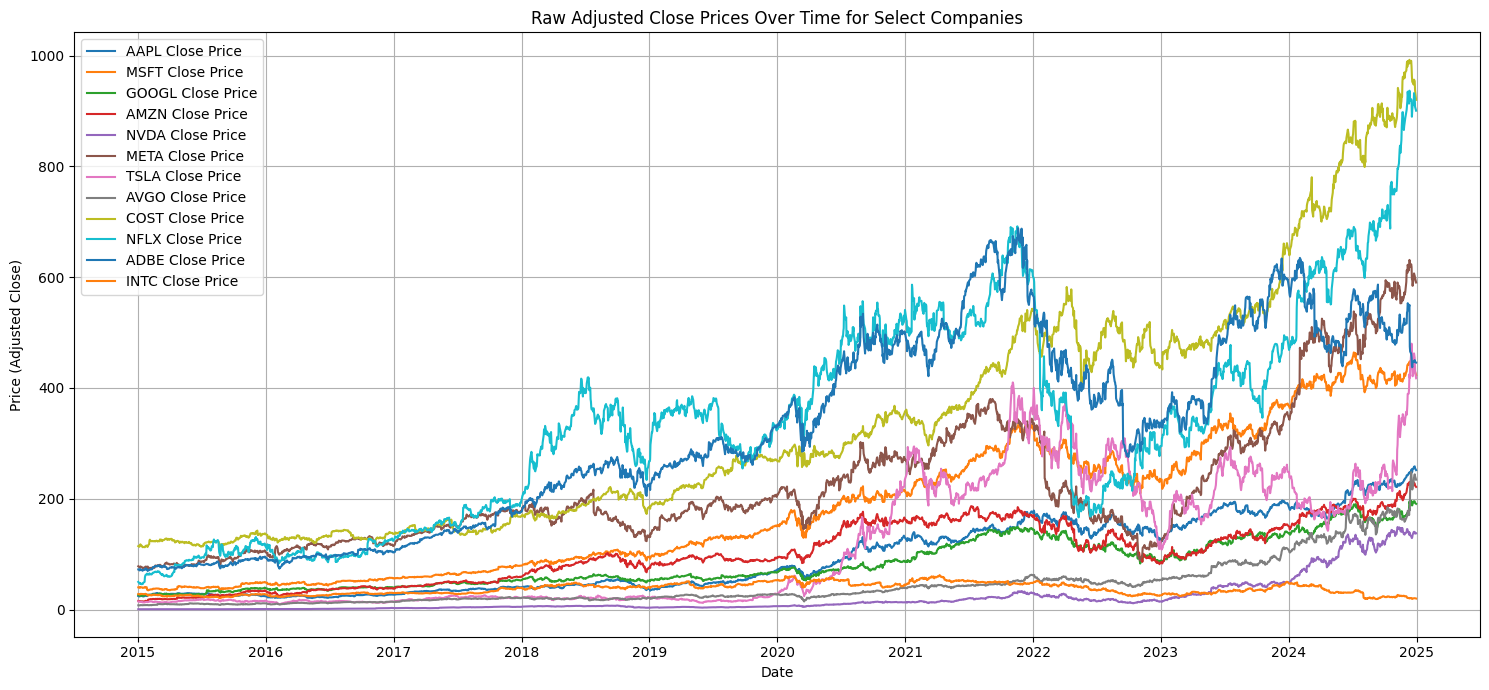

In [5]:
Tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META',
           'TSLA', 'AVGO', 'COST', 'NFLX', 'ADBE', 'INTC']
Start_Date = '2015-01-01'
End_Date = '2024-12-31'

Drive_Path = '/content/drive/MyDrive/Colab Notebooks/Stock_Market_Data/'

def download_stock_data(ticker, start, end):
    print(f"Downloading data for {ticker} from {start} to {end} ...")
    df = yf.download(ticker, start=start, end=end, auto_adjust=True)
    if df.empty:
        print(f"No data downloaded for {ticker}.")
    else:
        print(f"Data for {ticker} downloaded. Shape: {df.shape}")
    return df

all_raw_data = {}
for ticker in Tickers:
    data = download_stock_data(ticker, Start_Date, End_Date)
    if not data.empty:
        all_raw_data[ticker] = data

if not all_raw_data:
    print("No data available for any ticker after download.")
    exit()

# Save data to CSV files
print("\n--- Saving Raw Data to CSV Files ---")
for ticker, df in all_raw_data.items():
    if not df.empty:
        filename = os.path.join(Drive_Path, f"{ticker}.csv")
        df.to_csv(filename)
        print(f"Data for {ticker} saved to {filename}")

# Graphical Representation of Raw Data
print("\n--- Visualizing Raw Close Prices ---")
plt.figure(figsize=(15, 7))
for ticker, df in all_raw_data.items():
    if not df.empty:
        plt.plot(df.index, df['Close'], label=f'{ticker} Close Price')
plt.title('Raw Adjusted Close Prices Over Time for Select Companies')
plt.xlabel('Date')
plt.ylabel('Price (Adjusted Close)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Calculating Technical Indicators for Stock Data

In [6]:
Drive_Path = '/content/drive/MyDrive/Colab Notebooks/Stock_Market_Data/'
Output_Drive_Path = '/content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/'
Plots_Output_Path = '/content/drive/MyDrive/Colab Notebooks/Stock_Market_Plots/'

# Ensure the output directory exists
os.makedirs(Output_Drive_Path, exist_ok=True)
os.makedirs(Plots_Output_Path, exist_ok=True)

# Define common parameters for preprocessing
LOOK_BACK_VALUES = [30, 60, 90, 120]
TARGET_COLUMN = 'Close' # The target variable for prediction
XGB_MAX_LAGS = 5 # Max lags for XGBoost features
ARIMA_TEST_RATIO = 0.15 # Test split ratio for ARIMA

# Dictionaries to store processed data
all_processed_data = {} # Stores DataFrames with technical indicators for each ticker
prepared_data_for_all_models = { # Stores final prepared data for specific models
    'lstm': {},
    'xgboost': {},
    'arima': {}
}
sample_ticker_for_plot = None # To store a ticker for visualization

# Global variable to store top features
TOP_FEATURES_FOR_MODELS = []
all_tickers_feature_importances = []

# Persistence File Paths
PROCESSED_DATA_PKL_PATH = os.path.join(Output_Drive_Path, 'all_processed_data.pkl')
PREPARED_DATA_PKL_PATH = os.path.join(Output_Drive_Path, 'prepared_data_for_all_models.pkl')
TRAINED_LSTM_MODELS_DIR = os.path.join(Output_Drive_Path, 'trained_lstm_models')
TRAINED_XGBOOST_MODELS_DIR = os.path.join(Output_Drive_Path, 'trained_xgboost_models')
TRAINED_ARIMA_MODELS_DIR = os.path.join(Output_Drive_Path, 'trained_arima_models')

os.makedirs(TRAINED_LSTM_MODELS_DIR, exist_ok=True)
os.makedirs(TRAINED_XGBOOST_MODELS_DIR, exist_ok=True)
os.makedirs(TRAINED_ARIMA_MODELS_DIR, exist_ok=True)

# Global variables to store the overall best LSTM model's performance
overall_best_rmse_val = float('inf')
overall_best_ticker_val = None
overall_best_params_val = None
overall_best_history_val = None
overall_best_look_back_val = None

# Global variables for overall best XGBoost model's performance
overall_best_xgb_rmse = float('inf')
overall_best_xgb_ticker = None
overall_best_xgb_params = None

# Global variables for overall best ARIMA model's performance
overall_best_arima_rmse = float('inf')
overall_best_arima_ticker = None
overall_best_arima_order = None


In [7]:
print("\n" + "="*50)
print("             CALCULATING TECHNICAL INDICATORS")
print("="*50)

def calculate_technical_indicators(df, ticker_name):
    """
    Calculates various technical indicators for the DataFrame.
    Returns: DataFrame with indicators, or empty DataFrame on error/missing data.
    """
    df_copy = df.copy()

    if df_copy.empty:
        print(f"Skipping {ticker_name}: DataFrame is empty.")
        return pd.DataFrame()

    # Ensure required columns are present and numeric
    required_cols = ['Close', 'High', 'Low', 'Open', 'Volume']
    if not all(col in df_copy.columns for col in required_cols):
        print(f"Skipping {ticker_name}: Missing one or more of OHLCV columns.")
        return pd.DataFrame()

    for col in required_cols:
        df_copy[col] = pd.to_numeric(df_copy[col], errors='coerce')

    print(f"Calculating technical indicators for {ticker_name}...")

    try:
        # Trend Indicators
        df_copy.ta.sma(length=200, append=True)
        df_copy.ta.sma(length=50, append=True)
        df_copy.ta.ema(length=26, append=True)
        df_copy.ta.macd(append=True)

        # Momentum Indicators
        df_copy.ta.rsi(length=14, append=True)
        df_copy.ta.willr(append=True)

        # Volatility Indicator
        df_copy.ta.bbands(append=True)

        # Volume Indicators
        df_copy.ta.obv(append=True)
        df_copy.ta.cmf(append=True)

        # Adding Daily Returns and Log Returns to measure change
        df_copy['Daily_Return'] = df_copy['Close'].pct_change()
        df_copy['Log_Return'] = np.log(df_copy['Close'] / df_copy['Close'].shift(1))

        # Replace inf/-inf with NaN (from log_return if Close price is 0 or very small)
        df_copy.replace([np.inf, -np.inf], np.nan, inplace=True)

        # Drop rows with NaN values introduced by indicator calculations
        initial_rows = len(df_copy)
        df_copy.dropna(inplace=True)
        rows_dropped = initial_rows - len(df_copy)
        if rows_dropped > 0:
            print(f"   Dropped {rows_dropped} rows with NaN values after indicator calculation for {ticker_name}.")
        else:
            print(f"   No NaN rows dropped after indicator calculation for {ticker_name}.")

        print(f"Technical indicators calculated for {ticker_name}.")
        return df_copy

    except Exception as e:
        print(f"Error calculating indicators for {ticker_name}: {e}")
        return pd.DataFrame()

# Feature Engineering function to return ALL importances for a single ticker
def get_ticker_feature_importances(df_with_indicators):
    """
    Calculates feature importances using an XGBoost Regressor for a single ticker.
    Returns: A pandas Series of feature importances, or None if not enough data/features.
    """
    df_fe = df_with_indicators.copy()

    df_fe['Target_Close'] = df_fe[TARGET_COLUMN].shift(-1)
    df_fe.dropna(subset=['Target_Close'], inplace=True)

    excluded_cols_for_features = ['Target_Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'Daily_Return', 'Log_Return']
    all_possible_features = [col for col in df_fe.columns
                             if col not in excluded_cols_for_features and pd.api.types.is_numeric_dtype(df_fe[col])]

    if not all_possible_features:
        return None

    X_fe = df_fe[all_possible_features]
    y_fe = df_fe['Target_Close']

    if len(X_fe) < 100: # Arbitrary minimum for sensible feature importance
        return None

    X_train_fe, _, y_train_fe, _ = train_test_split(
        X_fe, y_fe, test_size=0.2, shuffle=False # Maintain chronological order
    )

    # Scaling Features
    scaler = StandardScaler()
    X_train_fe_scaled = scaler.fit_transform(X_train_fe)
    X_train_fe = pd.DataFrame(X_train_fe_scaled, columns=X_train_fe.columns, index=X_train_fe.index)

    # Train an XGBoost Regressor to get feature importances
    xgb_model_fe = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42,
                                     n_jobs=-1, tree_method='hist', enable_categorical=False)
    xgb_model_fe.fit(X_train_fe, y_train_fe)

    return pd.Series(xgb_model_fe.feature_importances_, index=all_possible_features)


# Processing Loop for Indicators and Feature Selection
if os.path.exists(PROCESSED_DATA_PKL_PATH):
    print(f"Loading all_processed_data from {PROCESSED_DATA_PKL_PATH}...")
    with open(PROCESSED_DATA_PKL_PATH, 'rb') as f:
        all_processed_data = pickle.load(f)
    if all_processed_data:
        sample_ticker_for_plot = next(iter(all_processed_data))
    print("all_processed_data loaded. Skipping indicator calculation.")
else:
    print(f"Checking for CSV files in {Drive_Path}...")
    csv_files = [f for f in os.listdir(Drive_Path) if f.endswith('.csv')]

    if not csv_files:
        print(f"No CSV files found in {Drive_Path}. Please check 'Drive_Path'.")
    else:
        print(f"Processing {len(csv_files)} CSV files for indicator calculation and collecting feature importances...")
        for file_name in csv_files:
            ticker = file_name.replace('.csv', '')
            file_path = os.path.join(Drive_Path, file_name)

            try:
                df = pd.read_csv(file_path, skiprows=3)
                df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
                df['Date'] = pd.to_datetime(df['Date'])
                df.set_index('Date', inplace=True)
                df.sort_index(inplace=True)

                df_with_indicators = calculate_technical_indicators(df.copy(), ticker)

                if not df_with_indicators.empty:
                    all_processed_data[ticker] = df_with_indicators

                    if sample_ticker_for_plot is None:
                        sample_ticker_for_plot = ticker

                    print(f"   Calculating feature importances for {ticker}...")
                    importances = get_ticker_feature_importances(df_with_indicators)
                    if importances is not None:
                        all_tickers_feature_importances.append(importances)
                    else:
                        print(f"   Skipping feature importance calculation for {ticker} due to insufficient data or features.")

            except pd.errors.ParserError as e:
                print(f"Error parsing CSV file {file_name}: {e}.")
            except Exception as e:
                print(f"An unexpected error occurred while processing {file_name}: {e}")

    # Global Feature Selection after processing all tickers
    if all_tickers_feature_importances:
        print(f"\n--- Aggregating Feature Importances Across All {len(all_tickers_feature_importances)} Tickers ---")
        combined_importances = pd.concat(all_tickers_feature_importances, axis=1).sum(axis=1)
        combined_importances = combined_importances.sort_values(ascending=False)

        num_features_to_select = 3
        TOP_FEATURES_FOR_MODELS = combined_importances.head(num_features_to_select).index.tolist()

        print(f"\nGlobal Top {num_features_to_select} Features (aggregated across all tickers):")
        print(combined_importances.head(num_features_to_select))
        print(f"\nSelected global top {num_features_to_select} features for models: {TOP_FEATURES_FOR_MODELS}")
    else:
        print("No feature importances were collected from any ticker. Cannot select global top features.")
        TOP_FEATURES_FOR_MODELS = []

    # Save all_processed_data after calculation
    if all_processed_data:
        with open(PROCESSED_DATA_PKL_PATH, 'wb') as f:
            pickle.dump(all_processed_data, f)
        print(f"All processed data with indicators saved to {PROCESSED_DATA_PKL_PATH}")
    else:
        print("No data was successfully processed to save to all_processed_data.pkl.")




             CALCULATING TECHNICAL INDICATORS
Loading all_processed_data from /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/all_processed_data.pkl...
all_processed_data loaded. Skipping indicator calculation.



--- Visualizing Technical Indicators for TSLA ---


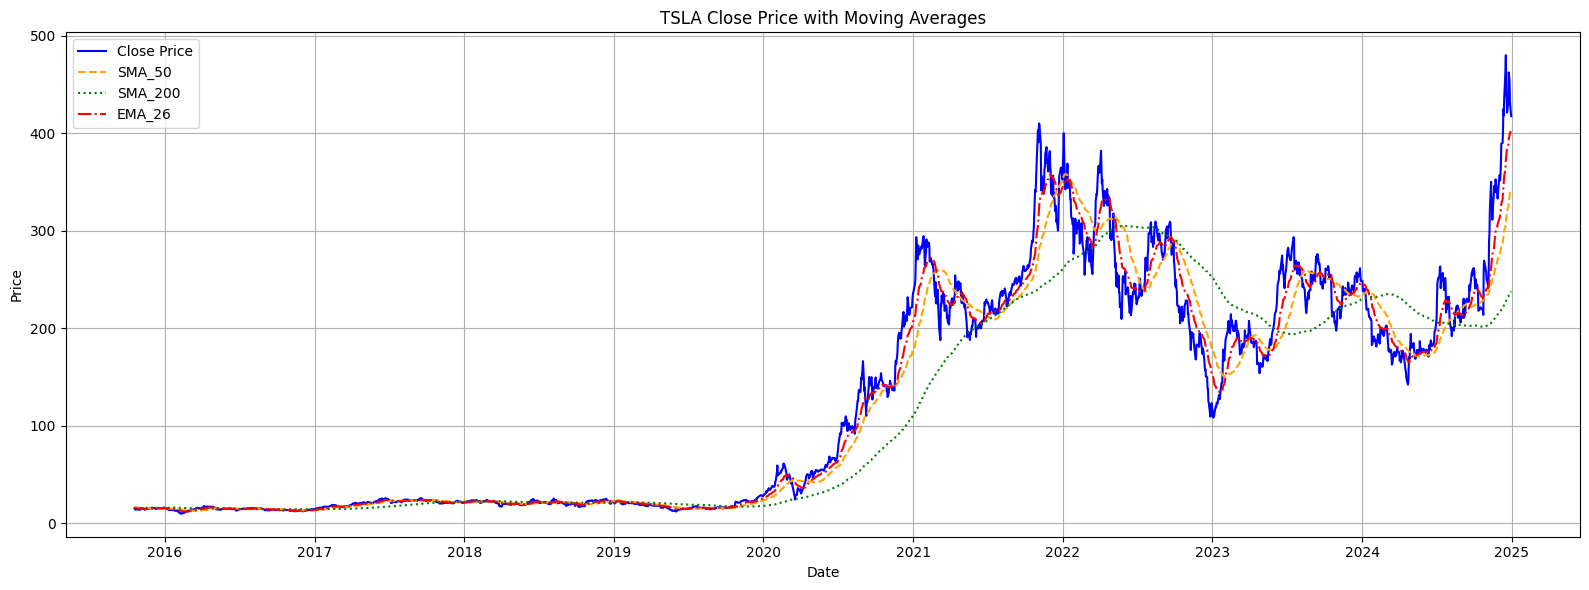

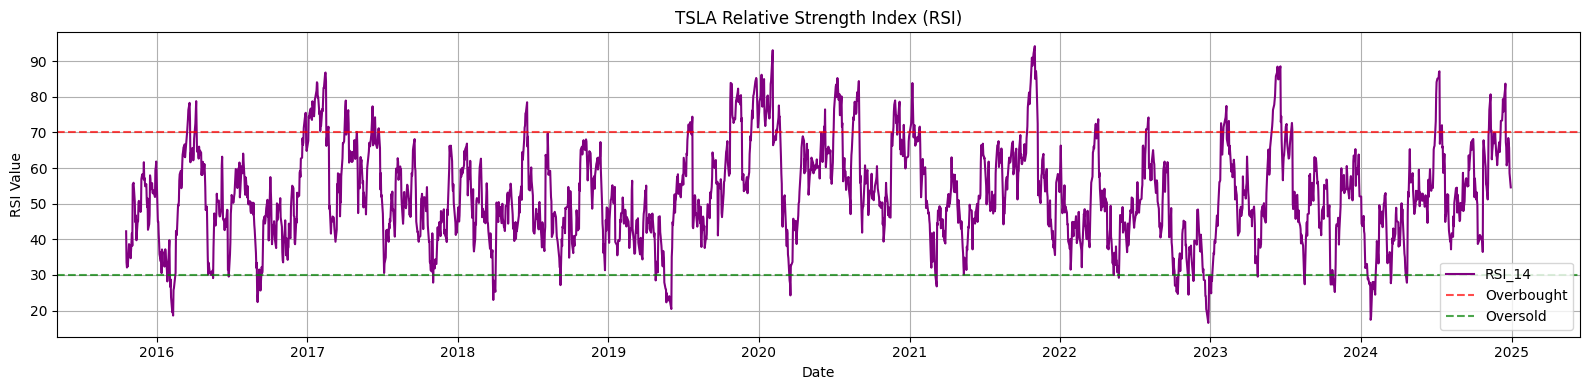

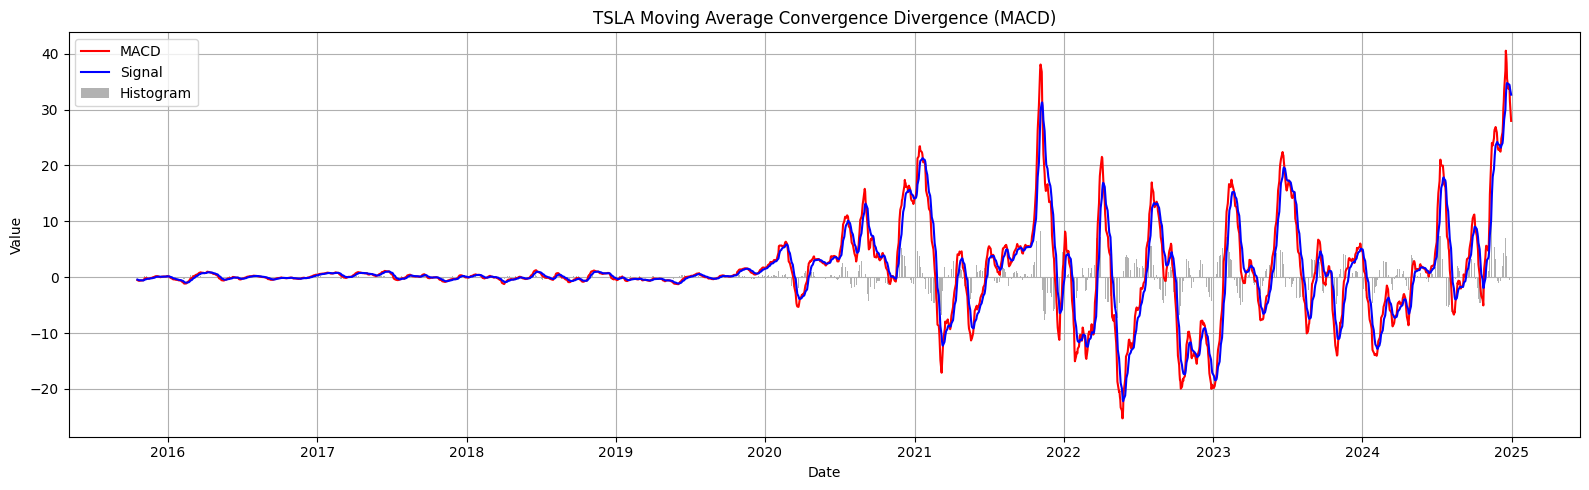

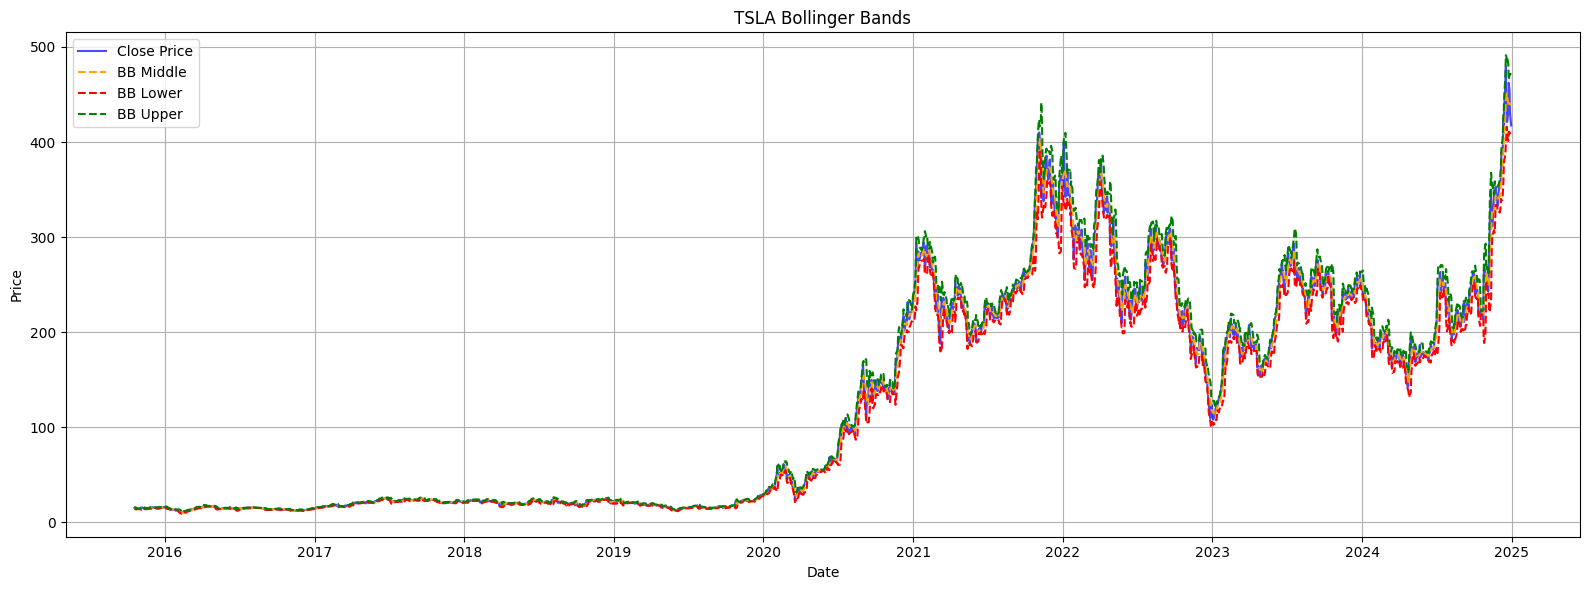

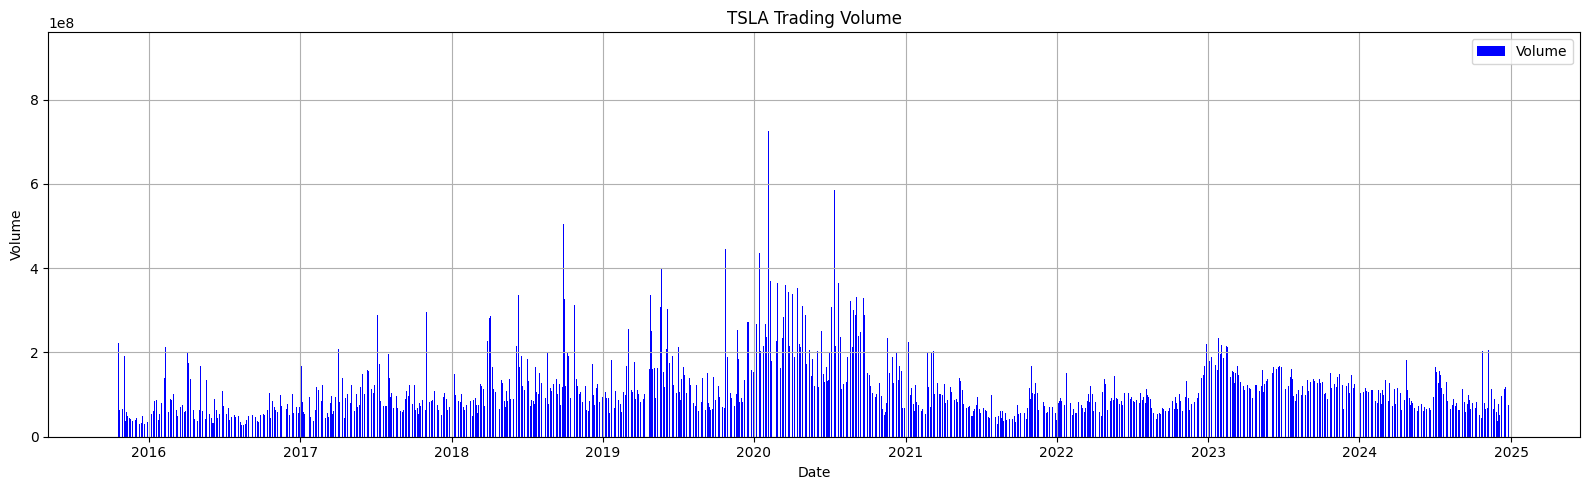

In [8]:
# Graphical Representation of Indicators (for one ticker)
if sample_ticker_for_plot and sample_ticker_for_plot in all_processed_data:
    sample_df = all_processed_data[sample_ticker_for_plot]

    # Ensure enough data for indicators to stabilize and plot meaningfully
    if not sample_df.empty and len(sample_df) > 200:

        print(f"\n--- Visualizing Technical Indicators for {sample_ticker_for_plot} ---")
        # Plot 1: Close Price with Moving Averages
        plt.figure(figsize=(16, 6))
        plt.plot(sample_df['Close'], label='Close Price', color='blue')
        if 'SMA_50' in sample_df.columns:
            plt.plot(sample_df['SMA_50'], label='SMA_50', color='orange', linestyle='--')
        if 'SMA_200' in sample_df.columns:
            plt.plot(sample_df['SMA_200'], label='SMA_200', color='green', linestyle=':')
        if 'EMA_26' in sample_df.columns:
            plt.plot(sample_df['EMA_26'], label='EMA_26', color='red', linestyle='-.')
        plt.title(f'{sample_ticker_for_plot} Close Price with Moving Averages')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        plt.savefig(os.path.join(Plots_Output_Path, f"{sample_ticker_for_plot}_Plot1_MA.png"))
        plt.close()

        # Plot 2: RSI
        if 'RSI_14' in sample_df.columns:
            plt.figure(figsize=(16, 4))
            plt.plot(sample_df['RSI_14'], label='RSI_14', color='purple')
            plt.axhline(70, color='red', linestyle='--', alpha=0.7, label='Overbought')
            plt.axhline(30, color='green', linestyle='--', alpha=0.7, label='Oversold')
            plt.title(f'{sample_ticker_for_plot} Relative Strength Index (RSI)')
            plt.xlabel('Date')
            plt.ylabel('RSI Value')
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()
            plt.savefig(os.path.join(Plots_Output_Path, f"{sample_ticker_for_plot}_Plot2_RSI.png"))
            plt.close()

        # Plot 3: MACD
        if 'MACD_12_26_9' in sample_df.columns and 'MACDs_12_26_9' in sample_df.columns and 'MACDh_12_26_9' in sample_df.columns:
            plt.figure(figsize=(16, 5))
            plt.plot(sample_df['MACD_12_26_9'], label='MACD', color='red')
            plt.plot(sample_df['MACDs_12_26_9'], label='Signal', color='blue')
            plt.bar(sample_df.index, sample_df['MACDh_12_26_9'], label='Histogram', color='gray', alpha=0.6)
            plt.title(f'{sample_ticker_for_plot} Moving Average Convergence Divergence (MACD)')
            plt.xlabel('Date')
            plt.ylabel('Value')
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()
            plt.savefig(os.path.join(Plots_Output_Path, f"{sample_ticker_for_plot}_Plot3_MACD.png"))
            plt.close()

        # Plot 4: Bollinger Bands
        if 'BBL_5_2.0' in sample_df.columns and 'BBM_5_2.0' in sample_df.columns and 'BBU_5_2.0' in sample_df.columns:
            plt.figure(figsize=(16, 6))
            plt.plot(sample_df['Close'], label='Close Price', color='blue', alpha=0.7)
            plt.plot(sample_df['BBM_5_2.0'], label='BB Middle', color='orange', linestyle='--')
            plt.plot(sample_df['BBL_5_2.0'], label='BB Lower', color='red', linestyle='--')
            plt.plot(sample_df['BBU_5_2.0'], label='BB Upper', color='green', linestyle='--')
            plt.fill_between(sample_df.index, sample_df['BBL_5_2.0'], sample_df['BBU_5_2.0'], color='gray', alpha=0.1)
            plt.title(f'{sample_ticker_for_plot} Bollinger Bands')
            plt.xlabel('Date')
            plt.ylabel('Price')
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()
            plt.savefig(os.path.join(Plots_Output_Path, f"{sample_ticker_for_plot}_Plot4_BBands.png"))
            plt.close()

        # Plot 5: Volume
        plt.figure(figsize=(16, 5))
        plt.bar(sample_df.index, sample_df['Volume'], color='blue', label='Volume')
        plt.title(f'{sample_ticker_for_plot} Trading Volume')
        plt.xlabel('Date')
        plt.ylabel('Volume')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        plt.savefig(os.path.join(Plots_Output_Path, f"{sample_ticker_for_plot}_Plot5_Volume.png"))
        plt.close()

    else:
        print(f"Not enough data (need >200 data points) for {sample_ticker_for_plot} or indicators not present to plot.")
else:
    print("No sample ticker available for plotting.")

## Data Preprocessing

In [9]:
print("\n\n" + "="*50)
print("          MODEL-SPECIFIC DATA PREPROCESSING")
print("="*50)

def preprocess_for_lstm_optimized(df, look_back, selected_features):
    """
    Prepares data for LSTM: creates target, directly creates 3D sequences
    from relevant columns (selected_features), scales data, and splits into train, validation, test sets chronologically.
    Returns: A dictionary containing all prepared datasets and scalers.
    """
    print(f"Starting optimized data preprocessing for LSTM for {df.name if hasattr(df, 'name') else 'current ticker'} with look_back={look_back}...")

    df_copy = df.copy()

    df_copy['Target_Close'] = df_copy[TARGET_COLUMN].shift(-1)
    df_copy.dropna(subset=['Target_Close'], inplace=True)

    features_to_use = [f for f in selected_features if f in df_copy.columns]
    if not features_to_use:
        print(f"Warning: No selected features found in DataFrame for {df.name}. Using all available numeric features.")
        features_to_use = [col for col in df_copy.columns
                             if col not in ['Target_Close'] and pd.api.types.is_numeric_dtype(df_copy[col])]
        if not features_to_use:
            print(f"Error: No numeric features available for LSTM for {df.name}.")
            return {
                'X_train_lstm': np.array([]), 'y_train_lstm': np.array([]),
                'X_val_lstm': np.array([]), 'y_val_lstm': np.array([]),
                'X_test_lstm': np.array([]), 'y_test_lstm': np.array([]),
                'y_test_raw': pd.Series(), 'scaler_X': None, 'scaler_y': None,
                'X_train_raw': pd.DataFrame(), 'y_train_raw': pd.Series(),
                'X_val_raw': pd.DataFrame(), 'y_val_raw': pd.Series(),
                'X_test_raw': pd.DataFrame(), 'y_test_scaled': np.array([]),
                'X_train_scaled': np.array([]), 'y_train_scaled': np.array([]),
                'X_val_scaled': np.array([]), 'y_val_scaled': np.array([]),
                'X_test_scaled': np.array([]), 'original_df_after_preprocessing': pd.DataFrame()
            }

    df_copy.dropna(subset=features_to_use, inplace=True)

    X_full = df_copy[features_to_use]
    y_full = df_copy['Target_Close']

    print(f"Features used by LSTM: {features_to_use}")
    print(f"Rows available for LSTM after initial target shift and feature NaNs: {len(X_full)}")

    train_size = int(len(X_full) * 0.7)
    val_size = int(len(X_full) * 0.15)

    X_train_raw = X_full.iloc[:train_size]
    y_train_raw = y_full.iloc[:train_size]

    X_val_raw = X_full.iloc[train_size : train_size + val_size]
    y_val_raw = y_full.iloc[train_size : train_size + val_size]

    X_test_raw = X_full.iloc[train_size + val_size :]
    y_test_raw = y_full.iloc[train_size + val_size :]

    scaler_X = MinMaxScaler(feature_range=(0, 1))
    scaler_y = MinMaxScaler(feature_range=(0, 1))

    X_train_scaled = scaler_X.fit_transform(X_train_raw)
    y_train_scaled = scaler_y.fit_transform(y_train_raw.values.reshape(-1, 1))

    X_val_scaled = scaler_X.transform(X_val_raw)
    y_val_scaled = scaler_y.transform(y_val_raw.values.reshape(-1, 1))

    X_test_scaled = scaler_X.transform(X_test_raw)
    y_test_scaled = scaler_y.transform(y_test_raw.values.reshape(-1, 1))

    def create_lstm_sequences_optimized(features_scaled, target_scaled, look_back_window):
        Xs, ys = [], []
        if len(features_scaled) <= look_back_window:
            return np.array([]), np.array([])
        for i in range(len(features_scaled) - look_back_window):
            Xs.append(features_scaled[i:(i + look_back_window)])
            ys.append(target_scaled[i + look_back_window])
        return np.array(Xs), np.array(ys)

    X_train_lstm, y_train_lstm = create_lstm_sequences_optimized(X_train_scaled, y_train_scaled, look_back)
    X_val_lstm, y_val_lstm = create_lstm_sequences_optimized(X_val_scaled, y_val_scaled, look_back)
    X_test_lstm, y_test_lstm = create_lstm_sequences_optimized(X_test_scaled, y_test_scaled, look_back)

    y_test_raw_lstm_aligned = y_test_raw.iloc[look_back:]

    print(f"Data preprocessing for LSTM (look_back={look_back}) complete.")
    print(f"X_train_lstm shape: {X_train_lstm.shape}, y_train_lstm shape: {y_train_lstm.shape}")

    return {
        'X_train_raw': X_train_raw, 'y_train_raw': y_train_raw,
        'X_val_raw': X_val_raw, 'y_val_raw': y_val_raw,
        'X_test_raw': X_test_raw, 'y_test_raw': y_test_raw_lstm_aligned,
        'X_train_scaled': X_train_scaled, 'y_train_scaled': y_train_scaled,
        'X_val_scaled': X_val_scaled, 'y_val_scaled': y_val_scaled,
        'X_test_scaled': X_test_scaled, 'y_test_scaled': y_test_scaled,
        'X_train_lstm': X_train_lstm, 'y_train_lstm': y_train_lstm,
        'X_val_lstm': X_val_lstm, 'y_val_lstm': y_val_lstm,
        'X_test_lstm': X_test_lstm, 'y_test_lstm': y_test_lstm,
        'scaler_X': scaler_X, 'scaler_y': scaler_y,
        'original_df_after_preprocessing': df_copy
    }

def preprocess_for_xgboost_optimized(df, max_lags=5, selected_features=None):
    """
    Prepares data for XGBoost: creates target, adds multiple lags for relevant features,
    and splits into train, validation, test sets chronologically.
    XGBoost does not require feature scaling.
    Returns: A dictionary containing all prepared datasets.
    """
    print(f"Starting data preprocessing for XGBoost for {df.name if hasattr(df, 'name') else 'current ticker'}...")

    df_copy = df.copy()

    # Target variable: Next day's Close price
    df_copy['Target_Close'] = df_copy[TARGET_COLUMN].shift(-1)

    # Define features to use for lagging
    if selected_features:
        features_for_lagging_xgb = [f for f in selected_features if f in df_copy.columns]
        if not features_for_lagging_xgb:
             print(f"Warning: No selected features found in DataFrame for {df.name}. Using all available numeric features.")
             features_for_lagging_xgb = [col for col in df_copy.columns
                                         if col not in ['Target_Close'] and pd.api.types.is_numeric_dtype(df_copy[col])]
    else: # If no specific features are selected, use all available numeric features
        features_for_lagging_xgb = [col for col in df_copy.columns
                                    if col not in ['Target_Close'] and pd.api.types.is_numeric_dtype(df_copy[col])]

    print(f"Features used by XGBoost (before lagging): {features_for_lagging_xgb}")
    print(f"Creating up to {max_lags} lags for {len(features_for_lagging_xgb)} features for XGBoost...")

    # Drop NaNs introduced by `Target_Close` before creating lags to ensure consistent row count
    df_copy.dropna(subset=['Target_Close'], inplace=True)
    df_copy.dropna(subset=features_for_lagging_xgb, inplace=True)

    for feature in features_for_lagging_xgb:
        for i in range(1, max_lags + 1):
            df_copy[f'{feature}_Lag_{i}'] = df_copy[feature].shift(i)

    # Drop rows with NaN values created by lagging and target
    initial_rows = len(df_copy)
    df_copy.dropna(inplace=True)
    rows_dropped = initial_rows - len(df_copy)
    if rows_dropped > 0:
        print(f"  Dropped {rows_dropped} rows due to NaNs after creating XGBoost lags and Target_Close.")
    else:
        print(f"  No NaN rows dropped for {ticker} after XGBoost lags and Target_Close.")


    # Separate features (X) and target (y)
    cols_to_drop_from_X_xgb = ['Target_Close'] + features_for_lagging_xgb
    X = df_copy.drop(columns=[col for col in cols_to_drop_from_X_xgb if col in df_copy.columns], errors='ignore')
    y = df_copy['Target_Close']

    print("Data preprocessing for XGBoost complete.")
    print(f"X_train shape: {X.shape}, y_train shape: {y.shape}") # Shape of full X, y before split

    # Chronological Split for Train, Validation, Test
    train_size = int(len(X) * 0.7)
    val_size = int(len(X) * 0.15)

    X_train, y_train = X.iloc[:train_size], y.iloc[:train_size]
    X_val, y_val = X.iloc[train_size : train_size + val_size], y.iloc[train_size : train_size + val_size]
    X_test, y_test = X.iloc[train_size + val_size :], y.iloc[train_size + val_size :]

    return {
        'X_train': X_train, 'y_train': y_train,
        'X_val': X_val, 'y_val': y_val,
        'X_test': X_test, 'y_test': y_test,
        'original_df_after_preprocessing': df_copy
    }

def preprocess_for_arima(df, test_split_ratio=0.15):
    """
    Prepares data for ARIMA: focuses on target series, stationarity check, and splitting.
    ARIMA typically works on a single time series, often the 'Close' price.
    Returns: A dictionary containing the train/test series and differencing info.
    """
    print(f"Starting data preprocessing for ARIMA for {df.name if hasattr(df, 'name') else 'current ticker'}...")

    df_copy = df.copy()
    df_copy = df_copy.sort_index()

    # Using the 'Close' price as the primary series.
    series = df_copy[TARGET_COLUMN].copy()

    # Drop any NaNs from the series itself before ADF test
    series.dropna(inplace=True)

    # Check for Stationarity and Note Differencing
    print("Checking for stationarity (ADF test) for ARIMA...")
    # Ensure there are enough non-NaN values for ADF test
    if len(series) < 20: # ADF test usually needs a minimum number of observations
        print(f"  Warning: Not enough data points ({len(series)}) for reliable ADF test for {df.name}. Assuming non-stationary.")
        adf_p_value = 1.0 # Assume non-stationary if not enough data
    else:
        # Import adfuller if not already imported at the top
        from statsmodels.tsa.stattools import adfuller
        adf_result = adfuller(series)
        adf_p_value = adf_result[1]
    print(f"ADF p-value: {adf_p_value:.4f}")

    if adf_p_value > 0.05:
        print("Series is likely non-stationary. ARIMA model will likely use differencing (d > 0).")
    else:
        print("Series appears stationary (d=0).")

    # Chronological Split for Train, Test
    train_size = int(len(series) * (1 - test_split_ratio))
    train_data = series.iloc[:train_size]
    test_data = series.iloc[train_size:]

    print("Data preprocessing for ARIMA complete.")
    print(f"Train data size: {len(train_data)}, Test data size: {len(test_data)}")
    return {
        'train_data': train_data,
        'test_data': test_data,
        'adf_p_value': adf_p_value,
        'original_full_series': df_copy[TARGET_COLUMN]
    }

# Main Loop for Data Preprocessing
if os.path.exists(PREPARED_DATA_PKL_PATH):
    print(f"Loading prepared_data_for_all_models from {PREPARED_DATA_PKL_PATH}...")
    with open(PREPARED_DATA_PKL_PATH, 'rb') as f:
        prepared_data_for_all_models = pickle.load(f)
    print("prepared_data_for_all_models loaded. Skipping preprocessing.")
else:
    if not all_processed_data:
        print("No data available in 'all_processed_data' from Section 1. Skipping Section 2 preprocessing.")
    else:
        print(f"Processing data for {len(all_processed_data)} tickers from 'all_processed_data' (from Section 1).")

        for ticker, df_with_indicators in all_processed_data.items():
            print(f"\n--- Preprocessing data for {ticker} for various models ---")
            if df_with_indicators.empty:
                print(f"Skipping preprocessing for {ticker} due to empty DataFrame (from indicator calculation).")
                continue

            df_for_model_prep = df_with_indicators.copy()
            df_for_model_prep.name = ticker

            # Loop through LOOK_BACK values to preprocess for LSTM
            prepared_data_for_all_models['lstm'][ticker] = {}
            for current_look_back in LOOK_BACK_VALUES:
                estimated_min_samples = int(len(df_for_model_prep) * 0.15)
                if estimated_min_samples > current_look_back + 1:
                    lstm_data = preprocess_for_lstm_optimized(df_for_model_prep.copy(), current_look_back, TOP_FEATURES_FOR_MODELS)
                    if lstm_data['X_train_lstm'].shape[0] > 0 and lstm_data['X_val_lstm'].shape[0] > 0 and lstm_data['X_test_lstm'].shape[0] > 0:
                        prepared_data_for_all_models['lstm'][ticker][current_look_back] = lstm_data
                    else:
                        print(f"Not enough LSTM sequences generated for {ticker} with look_back={current_look_back}. Skipping LSTM data for this look_back.")
                else:
                    print(f"{ticker} has only {len(df_for_model_prep)} rows, insufficient for LSTM with look_back={current_look_back}.")


            # Preprocess for XGBoost
            min_rows_needed_for_xgb = XGB_MAX_LAGS + 2
            if len(df_for_model_prep) >= min_rows_needed_for_xgb:
                prepared_data_for_all_models['xgboost'][ticker] = preprocess_for_xgboost_optimized(df_for_model_prep.copy(), max_lags=XGB_MAX_LAGS, selected_features=TOP_FEATURES_FOR_MODELS)
            else:
                print(f"Warning: {ticker} has only {len(df_for_model_prep)} rows, insufficient for XGBoost preprocessing.")

            # Preprocess for ARIMA
            if len(df_for_model_prep) >= 50:
                prepared_data_for_all_models['arima'][ticker] = preprocess_for_arima(df_for_model_prep.copy(), test_split_ratio=ARIMA_TEST_RATIO)
            else:
                print(f"Warning: {ticker} has only {len(df_for_model_prep)} rows, which is too few for ARIMA modeling.")

    # Save prepared_data_for_all_models after preprocessing
    if any(v for d in prepared_data_for_all_models['lstm'].values() for v in d.values()) or \
       any(prepared_data_for_all_models['xgboost'].values()) or \
       any(prepared_data_for_all_models['arima'].values()):
        with open(PREPARED_DATA_PKL_PATH, 'wb') as f:
            pickle.dump(prepared_data_for_all_models, f)
        print(f"All prepared data for models saved to {PREPARED_DATA_PKL_PATH}")
    else:
        print("No data was successfully prepared for any model to save to prepared_data_for_all_models.pkl.")


if not any(v for d in prepared_data_for_all_models['lstm'].values() for v in d.values()) and \
   not prepared_data_for_all_models['xgboost'] and \
   not prepared_data_for_all_models['arima']:
    print("No data was successfully prepared for any model or ticker in Section 2.")
else:
    print("\n" + "="*80)
    print("          DATA PREPROCESSING COMPLETE.")
    print("="*80)



          MODEL-SPECIFIC DATA PREPROCESSING
Loading prepared_data_for_all_models from /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/prepared_data_for_all_models.pkl...
prepared_data_for_all_models loaded. Skipping preprocessing.

          DATA PREPROCESSING COMPLETE.


### Graphical Representation of Pre-Processed Data


--- Visualizing Preprocessed Data ---

--- Visualizing LSTM Test Data for TSLA (LookBack=30) ---


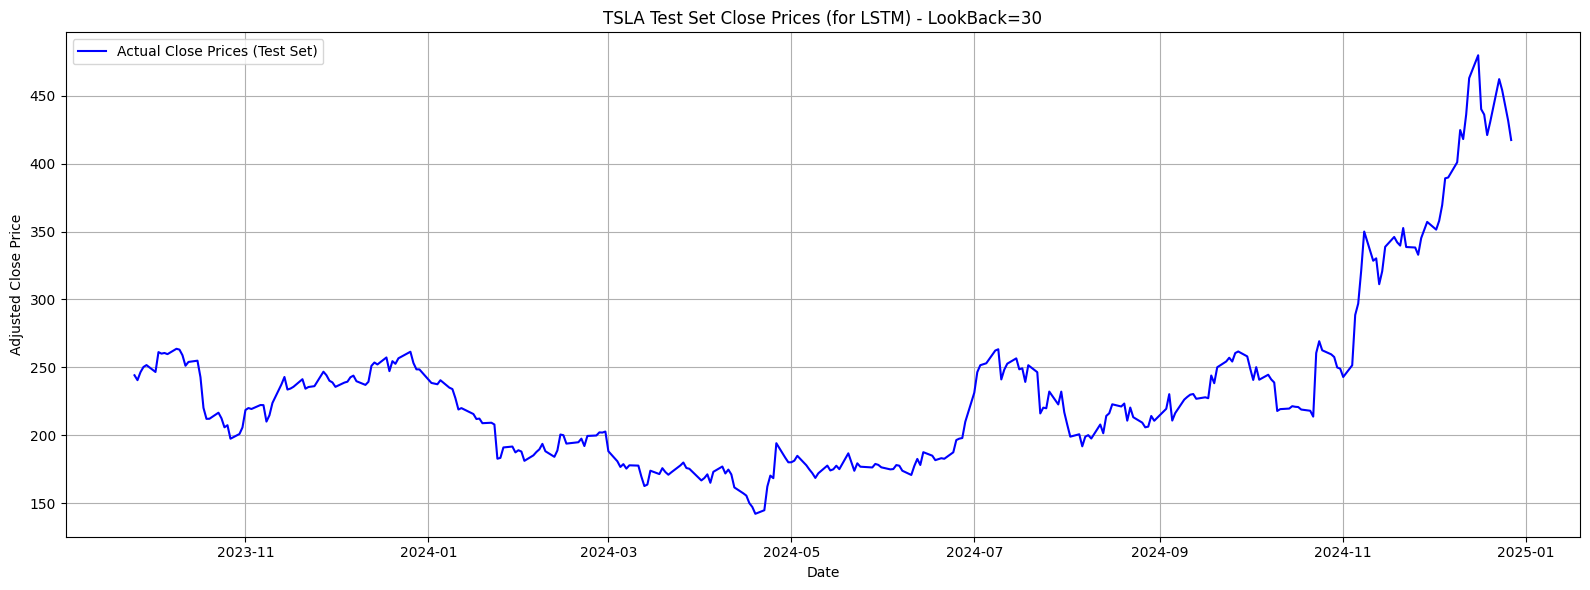


--- Example LSTM Input Sequence Shape for TSLA (LookBack=30) ---
Shape of one LSTM input sequence (timesteps, features): (30, 3)
Number of features used per timestep: 3

--- Visualizing XGBoost Test Data for TSLA ---


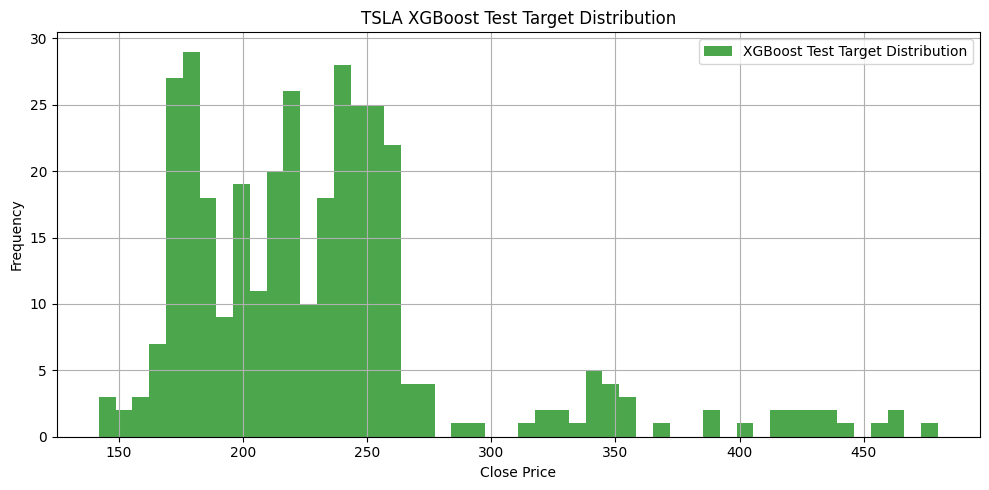


--- Example XGBoost Input Features Shape for TSLA ---
Shape of one XGBoost input sample (features): (34,)
Total number of features (including lags): 34

--- Visualizing ARIMA Train/Test Split for TSLA ---


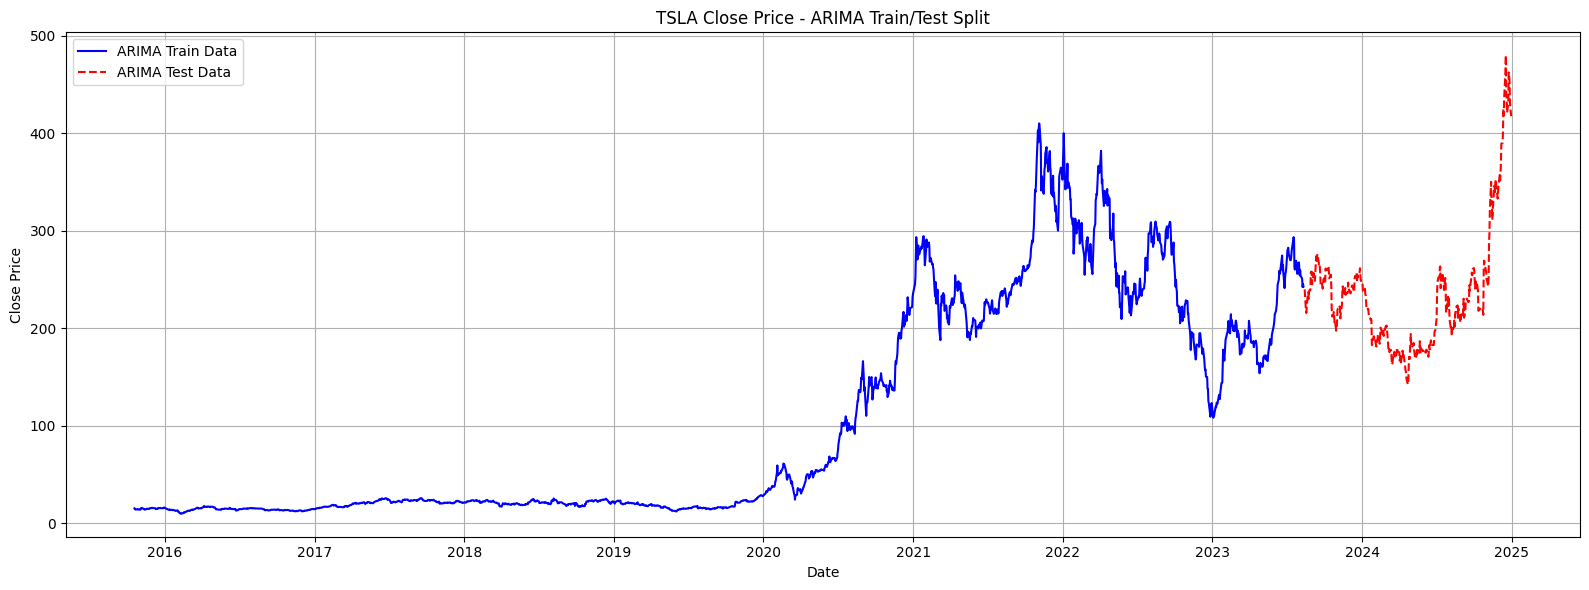


ADF p-value for TSLA ARIMA series: 0.8781


In [10]:
print("\n--- Visualizing Preprocessed Data ---")
sample_ticker_for_lstm_plot = None
# Find a ticker that has at least one look_back data prepared for LSTM
for ticker_name, look_back_data in prepared_data_for_all_models['lstm'].items():
    if look_back_data: # Check if the inner dictionary is not empty
        first_look_back_key = next(iter(look_back_data)) # Get the first look_back key
        data = look_back_data[first_look_back_key]
        if data['X_test_lstm'].shape[0] > 0 and data['y_test_raw'].shape[0] > 0:
            sample_ticker_for_lstm_plot = ticker_name
            sample_look_back_for_plot = first_look_back_key
            break

if sample_ticker_for_lstm_plot:
    print(f"\n--- Visualizing LSTM Test Data for {sample_ticker_for_lstm_plot} (LookBack={sample_look_back_for_plot}) ---")
    lstm_data_for_plot = prepared_data_for_all_models['lstm'][sample_ticker_for_lstm_plot][sample_look_back_for_plot]

    plt.figure(figsize=(16, 6))
    plt.plot(lstm_data_for_plot['y_test_raw'].index, lstm_data_for_plot['y_test_raw'], label='Actual Close Prices (Test Set)', color='blue')
    plt.title(f'{sample_ticker_for_lstm_plot} Test Set Close Prices (for LSTM) - LookBack={sample_look_back_for_plot}')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    plt.savefig(os.path.join(Plots_Output_Path, f"{sample_ticker_for_lstm_plot}_LSTM_Test_Data_lb{sample_look_back_for_plot}.png"))
    plt.close()

    print(f"\n--- Example LSTM Input Sequence Shape for {sample_ticker_for_lstm_plot} (LookBack={sample_look_back_for_plot}) ---")
    if lstm_data_for_plot['X_train_lstm'].shape[0] > 0:
        first_lstm_input_sample = lstm_data_for_plot['X_train_lstm'][0]
        print(f"Shape of one LSTM input sequence (timesteps, features): {first_lstm_input_sample.shape}")
        print(f"Number of features used per timestep: {first_lstm_input_sample.shape[1]}")

sample_ticker_for_xgb_plot = None
for ticker_name, data in prepared_data_for_all_models['xgboost'].items():
    if data['X_test'].shape[0] > 0 and data['y_test'].shape[0] > 0:
        sample_ticker_for_xgb_plot = ticker_name
        break
if sample_ticker_for_xgb_plot:
    print(f"\n--- Visualizing XGBoost Test Data for {sample_ticker_for_xgb_plot} ---")
    xgb_data_for_plot = prepared_data_for_all_models['xgboost'][sample_ticker_for_xgb_plot]

    plt.figure(figsize=(10, 5))
    plt.hist(xgb_data_for_plot['y_test'], bins=50, alpha=0.7, color='green', label='XGBoost Test Target Distribution')
    plt.title(f'{sample_ticker_for_xgb_plot} XGBoost Test Target Distribution')
    plt.xlabel('Close Price')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    plt.savefig(os.path.join(Plots_Output_Path, f"{sample_ticker_for_xgb_plot}_XGBoost_Test_Target_Distribution.png"))
    plt.close()

    print(f"\n--- Example XGBoost Input Features Shape for {sample_ticker_for_xgb_plot} ---")
    if xgb_data_for_plot['X_train'].shape[0] > 0:
        print(f"Shape of one XGBoost input sample (features): {xgb_data_for_plot['X_train'].iloc[0].shape}")
        print(f"Total number of features (including lags): {xgb_data_for_plot['X_train'].shape[1]}")

sample_ticker_for_arima_plot = None
for ticker_name, data in prepared_data_for_all_models['arima'].items():
    if data['test_data'].shape[0] > 0:
        sample_ticker_for_arima_plot = ticker_name
        break
if sample_ticker_for_arima_plot:
    print(f"\n--- Visualizing ARIMA Train/Test Split for {sample_ticker_for_arima_plot} ---")
    arima_data_for_plot = prepared_data_for_all_models['arima'][sample_ticker_for_arima_plot]

    plt.figure(figsize=(16, 6))
    plt.plot(arima_data_for_plot['train_data'].index, arima_data_for_plot['train_data'], label='ARIMA Train Data', color='blue')
    plt.plot(arima_data_for_plot['test_data'].index, arima_data_for_plot['test_data'], label='ARIMA Test Data', color='red', linestyle='--')
    plt.title(f'{sample_ticker_for_arima_plot} Close Price - ARIMA Train/Test Split')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    plt.savefig(os.path.join(Plots_Output_Path, f"{sample_ticker_for_arima_plot}_ARIMA_Train_Test_Split.png"))
    plt.close()

    print(f"\nADF p-value for {sample_ticker_for_arima_plot} ARIMA series: {arima_data_for_plot['adf_p_value']:.4f}")



## LSTM Model

In [12]:
def build_hypermodel(hp, input_shape):
    model = Sequential()

    # Determine whether a second LSTM layer will be added
    add_second_lstm_layer = hp.Boolean('add_second_lstm_layer', default=False)

    return_sequences_for_first_lstm = add_second_lstm_layer # OPTIMIZATION: Correctly link return_sequences

    # Tune the number of LSTM units in the first layer
    lstm_units_1 = hp.Int('lstm_units_1', min_value=32, max_value=96, step=32)
    model.add(LSTM(units=lstm_units_1, return_sequences=return_sequences_for_first_lstm, input_shape=input_shape))

    # Tune dropout rate for the first dropout layer
    dropout_rate_1 = hp.Float('dropout_rate_1', min_value=0.1, max_value=0.2, step=0.1)
    model.add(Dropout(dropout_rate_1))

    # Add second LSTM layer conditionally
    if add_second_lstm_layer:
        lstm_units_2 = hp.Int('lstm_units_2', min_value=32, max_value=64, step=32)
        model.add(LSTM(units=lstm_units_2, return_sequences=False))
        dropout_rate_2 = hp.Float('dropout_rate_2', min_value=0.1, max_value=0.2, step=0.1)
        model.add(Dropout(dropout_rate_2))

    model.add(Dense(units=1))

    # Tune learning rate for Adam optimizer
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 5e-3, 1e-3])
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

overall_best_rmse_val = float('inf')
overall_best_ticker_val = None
overall_best_params_val = None
overall_best_history_val = None
overall_best_look_back_val = None

if not prepared_data_for_all_models['lstm']:
    print("No LSTM data prepared for any ticker. Skipping LSTM model training.")
else:
    for ticker, look_back_datasets in prepared_data_for_all_models['lstm'].items():
        if not look_back_datasets:
            print(f"No LSTM data prepared for {ticker} for any look_back value. Skipping.")
            continue

        for current_look_back, data in look_back_datasets.items():
            X_train_lstm = data['X_train_lstm']
            y_train_lstm = data['y_train_lstm']
            X_val_lstm = data['X_val_lstm']
            y_val_lstm = data['y_val_lstm']
            X_test_lstm = data['X_test_lstm']
            y_test_lstm = data['y_test_lstm']
            scaler_y = data['scaler_y']

            if X_train_lstm.shape[0] == 0 or X_val_lstm.shape[0] == 0 or X_test_lstm.shape[0] == 0:
                print(f"Skipping LSTM tuning for {ticker} with look_back={current_look_back}: Insufficient data.")
                continue

            model_file_name = f'{ticker}_lb{current_look_back}_best_lstm_model.h5'
            model_path = os.path.join(TRAINED_LSTM_MODELS_DIR, model_file_name)

            if os.path.exists(model_path) and 'best_y_pred_lstm_original_scale' in data:
                print(f"Loading trained LSTM model for {ticker} (LB={current_look_back}) from {model_path} and its predictions...")
                lstm_model = tf.keras.models.load_model(model_path)
                y_pred = data['best_y_pred_lstm_original_scale']
                rmse = data['best_rmse']
                mae = data['best_mae']
                history_data = data['best_lstm_training_history']
                print(f"  Loaded - Test RMSE: {rmse:.4f}, MAE: {mae:.4f}")
            else:
                print(f"\n--- Starting KerasTuner Random Search for {ticker} (LookBack={current_look_back}) ---")
                input_shape = (X_train_lstm.shape[1], X_train_lstm.shape[2])

                tuner = kt.RandomSearch(
                    lambda hp: build_hypermodel(hp, input_shape),
                    objective='val_loss',
                    max_trials=10,
                    executions_per_trial=1,
                    directory='keras_tuner_logs',
                    project_name=f'lstm_tuning_{ticker}_lb{current_look_back}',
                    overwrite=False
                )

                early_stopping_tuner = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=0)

                tuner.search(X_train_lstm, y_train_lstm,
                             epochs=75,
                             batch_size=32,
                             validation_data=(X_val_lstm, y_val_lstm),
                             callbacks=[early_stopping_tuner],
                             verbose=0)

                best_hp_for_ticker_lb = tuner.get_best_hyperparameters(num_trials=1)
                if not best_hp_for_ticker_lb:
                    print(f"  No best hyperparameters found for {ticker} with look_back={current_look_back}. Skipping.")
                    continue
                best_hp_for_ticker_lb = best_hp_for_ticker_lb[0]
                best_model_for_ticker_lb = tuner.get_best_models(num_models=1)[0]


                print(f"\nBest hyperparameters for {ticker} (LookBack={current_look_back}):")
                print(best_hp_for_ticker_lb.values)

                test_loss = best_model_for_ticker_lb.evaluate(X_test_lstm, y_test_lstm, verbose=0)
                y_pred_scaled = best_model_for_ticker_lb.predict(X_test_lstm, verbose=0)
                y_pred = scaler_y.inverse_transform(y_pred_scaled)
                y_actual_raw = data['y_test_raw']

                rmse = math.sqrt(mean_squared_error(y_actual_raw, y_pred))
                mae = mean_absolute_error(y_actual_raw, y_pred)

                print(f"  {ticker} (LB={current_look_back}) - Best Test Loss (MSE): {test_loss:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}")

                best_model_for_ticker_lb.save(model_path)
                print(f"Best LSTM model for {ticker} (LB={current_look_back}) saved to {model_path}")

                re_built_best_model = tuner.hypermodel.build(best_hp_for_ticker_lb)
                history_best_model = re_built_best_model.fit(X_train_lstm, y_train_lstm,
                                                             epochs=75,
                                                             batch_size=32,
                                                             validation_data=(X_val_lstm, y_val_lstm),
                                                             callbacks=[early_stopping_tuner],
                                                             verbose=0)
                history_data = history_best_model.history

            data['best_y_pred_lstm_original_scale'] = y_pred
            data['best_y_actual_lstm_original_scale_for_plot'] = y_actual_raw
            data['best_lstm_hyperparams'] = best_hp_for_ticker_lb.values if 'best_hp_for_ticker_lb' in locals() else data.get('best_lstm_hyperparams')
            data['best_lstm_training_history'] = history_data
            data['best_rmse'] = rmse
            data['best_mae'] = mae

            if rmse < overall_best_rmse_val:
                overall_best_rmse_val = rmse
                overall_best_ticker_val = ticker
                overall_best_params_val = data['best_lstm_hyperparams']
                overall_best_look_back_val = current_look_back
                overall_best_history_val = history_data

Loading trained LSTM model for TSLA (LB=30) from /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/trained_lstm_models/TSLA_lb30_best_lstm_model.h5 and its predictions...


  Loaded - Test RMSE: 17.8325, MAE: 11.9953

--- Starting KerasTuner Random Search for TSLA (LookBack=60) ---
Reloading Tuner from keras_tuner_logs/lstm_tuning_TSLA_lb60/tuner0.json

Best hyperparameters for TSLA (LookBack=60):
{'add_second_lstm_layer': False, 'lstm_units_1': 32, 'dropout_rate_1': 0.1, 'learning_rate': 0.01}


  TSLA (LB=60) - Best Test Loss (MSE): 0.0018, RMSE: 16.8476, MAE: 11.4206
Best LSTM model for TSLA (LB=60) saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/trained_lstm_models/TSLA_lb60_best_lstm_model.h5

--- Starting KerasTuner Random Search for TSLA (LookBack=90) ---

Best hyperparameters for TSLA (LookBack=90):
{'add_second_lstm_layer': False, 'lstm_units_1': 64, 'dropout_rate_1': 0.1, 'learning_rate': 0.01, 'lstm_units_2': 64, 'dropout_rate_2': 0.2}


  TSLA (LB=90) - Best Test Loss (MSE): 0.0019, RMSE: 17.3661, MAE: 11.8749
Best LSTM model for TSLA (LB=90) saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/trained_lstm_models/TSLA_lb90_best_lstm_model.h5

--- Starting KerasTuner Random Search for TSLA (LookBack=120) ---

Best hyperparameters for TSLA (LookBack=120):
{'add_second_lstm_layer': True, 'lstm_units_1': 96, 'dropout_rate_1': 0.1, 'learning_rate': 0.01, 'lstm_units_2': 64, 'dropout_rate_2': 0.1}


  TSLA (LB=120) - Best Test Loss (MSE): 0.0024, RMSE: 19.4912, MAE: 13.6795
Best LSTM model for TSLA (LB=120) saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/trained_lstm_models/TSLA_lb120_best_lstm_model.h5

--- Starting KerasTuner Random Search for NFLX (LookBack=30) ---

Best hyperparameters for NFLX (LookBack=30):
{'add_second_lstm_layer': False, 'lstm_units_1': 96, 'dropout_rate_1': 0.1, 'learning_rate': 0.005, 'lstm_units_2': 64, 'dropout_rate_2': 0.2}


  NFLX (LB=30) - Best Test Loss (MSE): 0.0012, RMSE: 21.2479, MAE: 15.2798
Best LSTM model for NFLX (LB=30) saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/trained_lstm_models/NFLX_lb30_best_lstm_model.h5

--- Starting KerasTuner Random Search for NFLX (LookBack=60) ---

Best hyperparameters for NFLX (LookBack=60):
{'add_second_lstm_layer': False, 'lstm_units_1': 96, 'dropout_rate_1': 0.1, 'learning_rate': 0.01, 'lstm_units_2': 64, 'dropout_rate_2': 0.2}


  NFLX (LB=60) - Best Test Loss (MSE): 0.0012, RMSE: 21.0316, MAE: 14.8974
Best LSTM model for NFLX (LB=60) saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/trained_lstm_models/NFLX_lb60_best_lstm_model.h5

--- Starting KerasTuner Random Search for NFLX (LookBack=90) ---

Best hyperparameters for NFLX (LookBack=90):
{'add_second_lstm_layer': False, 'lstm_units_1': 64, 'dropout_rate_1': 0.1, 'learning_rate': 0.01, 'lstm_units_2': 32, 'dropout_rate_2': 0.2}


  NFLX (LB=90) - Best Test Loss (MSE): 0.0016, RMSE: 24.2138, MAE: 17.8006
Best LSTM model for NFLX (LB=90) saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/trained_lstm_models/NFLX_lb90_best_lstm_model.h5

--- Starting KerasTuner Random Search for NFLX (LookBack=120) ---

Best hyperparameters for NFLX (LookBack=120):
{'add_second_lstm_layer': False, 'lstm_units_1': 32, 'dropout_rate_1': 0.1, 'learning_rate': 0.01, 'lstm_units_2': 64, 'dropout_rate_2': 0.2}


  NFLX (LB=120) - Best Test Loss (MSE): 0.0024, RMSE: 30.0683, MAE: 24.7526
Best LSTM model for NFLX (LB=120) saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/trained_lstm_models/NFLX_lb120_best_lstm_model.h5

--- Starting KerasTuner Random Search for AVGO (LookBack=30) ---

Best hyperparameters for AVGO (LookBack=30):
{'add_second_lstm_layer': False, 'lstm_units_1': 64, 'dropout_rate_1': 0.1, 'learning_rate': 0.01, 'lstm_units_2': 64, 'dropout_rate_2': 0.1}


  AVGO (LB=30) - Best Test Loss (MSE): 0.0394, RMSE: 10.6695, MAE: 6.4209
Best LSTM model for AVGO (LB=30) saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/trained_lstm_models/AVGO_lb30_best_lstm_model.h5

--- Starting KerasTuner Random Search for AVGO (LookBack=60) ---

Best hyperparameters for AVGO (LookBack=60):
{'add_second_lstm_layer': False, 'lstm_units_1': 96, 'dropout_rate_1': 0.1, 'learning_rate': 0.01}


  AVGO (LB=60) - Best Test Loss (MSE): 0.0533, RMSE: 12.4115, MAE: 7.8547
Best LSTM model for AVGO (LB=60) saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/trained_lstm_models/AVGO_lb60_best_lstm_model.h5

--- Starting KerasTuner Random Search for AVGO (LookBack=90) ---

Best hyperparameters for AVGO (LookBack=90):
{'add_second_lstm_layer': False, 'lstm_units_1': 96, 'dropout_rate_1': 0.1, 'learning_rate': 0.005, 'lstm_units_2': 64, 'dropout_rate_2': 0.1}


  AVGO (LB=90) - Best Test Loss (MSE): 0.0440, RMSE: 11.2765, MAE: 7.0932
Best LSTM model for AVGO (LB=90) saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/trained_lstm_models/AVGO_lb90_best_lstm_model.h5

--- Starting KerasTuner Random Search for AVGO (LookBack=120) ---

Best hyperparameters for AVGO (LookBack=120):
{'add_second_lstm_layer': False, 'lstm_units_1': 96, 'dropout_rate_1': 0.2, 'learning_rate': 0.01, 'lstm_units_2': 32, 'dropout_rate_2': 0.2}


  AVGO (LB=120) - Best Test Loss (MSE): 0.1303, RMSE: 19.4038, MAE: 13.8285
Best LSTM model for AVGO (LB=120) saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/trained_lstm_models/AVGO_lb120_best_lstm_model.h5

--- Starting KerasTuner Random Search for AMZN (LookBack=30) ---

Best hyperparameters for AMZN (LookBack=30):
{'add_second_lstm_layer': False, 'lstm_units_1': 96, 'dropout_rate_1': 0.1, 'learning_rate': 0.005, 'lstm_units_2': 64, 'dropout_rate_2': 0.2}


  AMZN (LB=30) - Best Test Loss (MSE): 0.0021, RMSE: 7.4256, MAE: 5.7043
Best LSTM model for AMZN (LB=30) saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/trained_lstm_models/AMZN_lb30_best_lstm_model.h5

--- Starting KerasTuner Random Search for AMZN (LookBack=60) ---

Best hyperparameters for AMZN (LookBack=60):
{'add_second_lstm_layer': False, 'lstm_units_1': 64, 'dropout_rate_1': 0.1, 'learning_rate': 0.01, 'lstm_units_2': 32, 'dropout_rate_2': 0.1}


  AMZN (LB=60) - Best Test Loss (MSE): 0.0025, RMSE: 8.0909, MAE: 6.1620
Best LSTM model for AMZN (LB=60) saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/trained_lstm_models/AMZN_lb60_best_lstm_model.h5

--- Starting KerasTuner Random Search for AMZN (LookBack=90) ---

Best hyperparameters for AMZN (LookBack=90):
{'add_second_lstm_layer': False, 'lstm_units_1': 64, 'dropout_rate_1': 0.1, 'learning_rate': 0.005, 'lstm_units_2': 64, 'dropout_rate_2': 0.1}


  AMZN (LB=90) - Best Test Loss (MSE): 0.0017, RMSE: 6.6378, MAE: 5.0889
Best LSTM model for AMZN (LB=90) saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/trained_lstm_models/AMZN_lb90_best_lstm_model.h5

--- Starting KerasTuner Random Search for AMZN (LookBack=120) ---

Best hyperparameters for AMZN (LookBack=120):
{'add_second_lstm_layer': False, 'lstm_units_1': 32, 'dropout_rate_1': 0.2, 'learning_rate': 0.01, 'lstm_units_2': 64, 'dropout_rate_2': 0.2}


  AMZN (LB=120) - Best Test Loss (MSE): 0.0022, RMSE: 7.6830, MAE: 5.8903
Best LSTM model for AMZN (LB=120) saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/trained_lstm_models/AMZN_lb120_best_lstm_model.h5

--- Starting KerasTuner Random Search for META (LookBack=30) ---

Best hyperparameters for META (LookBack=30):
{'add_second_lstm_layer': True, 'lstm_units_1': 64, 'dropout_rate_1': 0.1, 'learning_rate': 0.01, 'lstm_units_2': 32, 'dropout_rate_2': 0.1}


  META (LB=30) - Best Test Loss (MSE): 0.0622, RMSE: 71.4163, MAE: 56.1500
Best LSTM model for META (LB=30) saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/trained_lstm_models/META_lb30_best_lstm_model.h5

--- Starting KerasTuner Random Search for META (LookBack=60) ---

Best hyperparameters for META (LookBack=60):
{'add_second_lstm_layer': False, 'lstm_units_1': 32, 'dropout_rate_1': 0.1, 'learning_rate': 0.01, 'lstm_units_2': 32, 'dropout_rate_2': 0.1}


  META (LB=60) - Best Test Loss (MSE): 0.0055, RMSE: 21.2245, MAE: 16.1478
Best LSTM model for META (LB=60) saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/trained_lstm_models/META_lb60_best_lstm_model.h5

--- Starting KerasTuner Random Search for META (LookBack=90) ---

Best hyperparameters for META (LookBack=90):
{'add_second_lstm_layer': True, 'lstm_units_1': 64, 'dropout_rate_1': 0.2, 'learning_rate': 0.01, 'lstm_units_2': 32, 'dropout_rate_2': 0.1}


  META (LB=90) - Best Test Loss (MSE): 0.1131, RMSE: 96.3191, MAE: 85.1596
Best LSTM model for META (LB=90) saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/trained_lstm_models/META_lb90_best_lstm_model.h5

--- Starting KerasTuner Random Search for META (LookBack=120) ---

Best hyperparameters for META (LookBack=120):
{'add_second_lstm_layer': True, 'lstm_units_1': 64, 'dropout_rate_1': 0.1, 'learning_rate': 0.005, 'lstm_units_2': 64, 'dropout_rate_2': 0.1}


  META (LB=120) - Best Test Loss (MSE): 0.0417, RMSE: 58.5187, MAE: 51.8055
Best LSTM model for META (LB=120) saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/trained_lstm_models/META_lb120_best_lstm_model.h5

--- Starting KerasTuner Random Search for MSFT (LookBack=30) ---

Best hyperparameters for MSFT (LookBack=30):
{'add_second_lstm_layer': False, 'lstm_units_1': 32, 'dropout_rate_1': 0.1, 'learning_rate': 0.01, 'lstm_units_2': 32, 'dropout_rate_2': 0.1}


  MSFT (LB=30) - Best Test Loss (MSE): 0.0013, RMSE: 10.4443, MAE: 8.6163
Best LSTM model for MSFT (LB=30) saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/trained_lstm_models/MSFT_lb30_best_lstm_model.h5

--- Starting KerasTuner Random Search for MSFT (LookBack=60) ---

Best hyperparameters for MSFT (LookBack=60):
{'add_second_lstm_layer': False, 'lstm_units_1': 64, 'dropout_rate_1': 0.1, 'learning_rate': 0.01, 'lstm_units_2': 32, 'dropout_rate_2': 0.2}


  MSFT (LB=60) - Best Test Loss (MSE): 0.0024, RMSE: 14.4332, MAE: 12.1560
Best LSTM model for MSFT (LB=60) saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/trained_lstm_models/MSFT_lb60_best_lstm_model.h5

--- Starting KerasTuner Random Search for MSFT (LookBack=90) ---

Best hyperparameters for MSFT (LookBack=90):
{'add_second_lstm_layer': False, 'lstm_units_1': 32, 'dropout_rate_1': 0.2, 'learning_rate': 0.01, 'lstm_units_2': 64, 'dropout_rate_2': 0.1}


  MSFT (LB=90) - Best Test Loss (MSE): 0.0035, RMSE: 17.1952, MAE: 14.9841
Best LSTM model for MSFT (LB=90) saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/trained_lstm_models/MSFT_lb90_best_lstm_model.h5

--- Starting KerasTuner Random Search for MSFT (LookBack=120) ---

Best hyperparameters for MSFT (LookBack=120):
{'add_second_lstm_layer': False, 'lstm_units_1': 64, 'dropout_rate_1': 0.1, 'learning_rate': 0.01, 'lstm_units_2': 64, 'dropout_rate_2': 0.2}


  MSFT (LB=120) - Best Test Loss (MSE): 0.0014, RMSE: 10.8186, MAE: 8.9592
Best LSTM model for MSFT (LB=120) saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/trained_lstm_models/MSFT_lb120_best_lstm_model.h5

--- Starting KerasTuner Random Search for COST (LookBack=30) ---

Best hyperparameters for COST (LookBack=30):
{'add_second_lstm_layer': False, 'lstm_units_1': 32, 'dropout_rate_1': 0.1, 'learning_rate': 0.01}


  COST (LB=30) - Best Test Loss (MSE): 0.0033, RMSE: 24.3916, MAE: 20.0842
Best LSTM model for COST (LB=30) saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/trained_lstm_models/COST_lb30_best_lstm_model.h5

--- Starting KerasTuner Random Search for COST (LookBack=60) ---

Best hyperparameters for COST (LookBack=60):
{'add_second_lstm_layer': False, 'lstm_units_1': 32, 'dropout_rate_1': 0.2, 'learning_rate': 0.01, 'lstm_units_2': 64, 'dropout_rate_2': 0.2}


  COST (LB=60) - Best Test Loss (MSE): 0.0017, RMSE: 17.6096, MAE: 13.6831
Best LSTM model for COST (LB=60) saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/trained_lstm_models/COST_lb60_best_lstm_model.h5

--- Starting KerasTuner Random Search for COST (LookBack=90) ---

Best hyperparameters for COST (LookBack=90):
{'add_second_lstm_layer': False, 'lstm_units_1': 32, 'dropout_rate_1': 0.1, 'learning_rate': 0.005, 'lstm_units_2': 64, 'dropout_rate_2': 0.2}


  COST (LB=90) - Best Test Loss (MSE): 0.0028, RMSE: 22.5538, MAE: 18.3879
Best LSTM model for COST (LB=90) saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/trained_lstm_models/COST_lb90_best_lstm_model.h5

--- Starting KerasTuner Random Search for COST (LookBack=120) ---

Best hyperparameters for COST (LookBack=120):
{'add_second_lstm_layer': False, 'lstm_units_1': 32, 'dropout_rate_1': 0.1, 'learning_rate': 0.01, 'lstm_units_2': 64, 'dropout_rate_2': 0.1}


  COST (LB=120) - Best Test Loss (MSE): 0.0024, RMSE: 20.5108, MAE: 16.3858
Best LSTM model for COST (LB=120) saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/trained_lstm_models/COST_lb120_best_lstm_model.h5

--- Starting KerasTuner Random Search for AAPL (LookBack=30) ---

Best hyperparameters for AAPL (LookBack=30):
{'add_second_lstm_layer': False, 'lstm_units_1': 64, 'dropout_rate_1': 0.2, 'learning_rate': 0.005, 'lstm_units_2': 32, 'dropout_rate_2': 0.2}


  AAPL (LB=30) - Best Test Loss (MSE): 0.0025, RMSE: 7.9220, MAE: 6.2585
Best LSTM model for AAPL (LB=30) saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/trained_lstm_models/AAPL_lb30_best_lstm_model.h5

--- Starting KerasTuner Random Search for AAPL (LookBack=60) ---

Best hyperparameters for AAPL (LookBack=60):
{'add_second_lstm_layer': False, 'lstm_units_1': 96, 'dropout_rate_1': 0.1, 'learning_rate': 0.01, 'lstm_units_2': 64, 'dropout_rate_2': 0.1}


  AAPL (LB=60) - Best Test Loss (MSE): 0.0029, RMSE: 8.5711, MAE: 6.8060
Best LSTM model for AAPL (LB=60) saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/trained_lstm_models/AAPL_lb60_best_lstm_model.h5

--- Starting KerasTuner Random Search for AAPL (LookBack=90) ---

Best hyperparameters for AAPL (LookBack=90):
{'add_second_lstm_layer': False, 'lstm_units_1': 32, 'dropout_rate_1': 0.1, 'learning_rate': 0.005, 'lstm_units_2': 64, 'dropout_rate_2': 0.1}


  AAPL (LB=90) - Best Test Loss (MSE): 0.0022, RMSE: 7.4079, MAE: 5.8755
Best LSTM model for AAPL (LB=90) saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/trained_lstm_models/AAPL_lb90_best_lstm_model.h5

--- Starting KerasTuner Random Search for AAPL (LookBack=120) ---

Best hyperparameters for AAPL (LookBack=120):
{'add_second_lstm_layer': False, 'lstm_units_1': 64, 'dropout_rate_1': 0.2, 'learning_rate': 0.005, 'lstm_units_2': 64, 'dropout_rate_2': 0.1}


  AAPL (LB=120) - Best Test Loss (MSE): 0.0036, RMSE: 9.5047, MAE: 7.6066
Best LSTM model for AAPL (LB=120) saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/trained_lstm_models/AAPL_lb120_best_lstm_model.h5

--- Starting KerasTuner Random Search for GOOGL (LookBack=30) ---

Best hyperparameters for GOOGL (LookBack=30):
{'add_second_lstm_layer': False, 'lstm_units_1': 32, 'dropout_rate_1': 0.2, 'learning_rate': 0.005, 'lstm_units_2': 32, 'dropout_rate_2': 0.1}


  GOOGL (LB=30) - Best Test Loss (MSE): 0.0055, RMSE: 8.5628, MAE: 7.1127
Best LSTM model for GOOGL (LB=30) saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/trained_lstm_models/GOOGL_lb30_best_lstm_model.h5

--- Starting KerasTuner Random Search for GOOGL (LookBack=60) ---

Best hyperparameters for GOOGL (LookBack=60):
{'add_second_lstm_layer': False, 'lstm_units_1': 64, 'dropout_rate_1': 0.1, 'learning_rate': 0.01, 'lstm_units_2': 64, 'dropout_rate_2': 0.2}


  GOOGL (LB=60) - Best Test Loss (MSE): 0.0037, RMSE: 7.0540, MAE: 5.7411
Best LSTM model for GOOGL (LB=60) saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/trained_lstm_models/GOOGL_lb60_best_lstm_model.h5

--- Starting KerasTuner Random Search for GOOGL (LookBack=90) ---

Best hyperparameters for GOOGL (LookBack=90):
{'add_second_lstm_layer': False, 'lstm_units_1': 96, 'dropout_rate_1': 0.1, 'learning_rate': 0.001}


  GOOGL (LB=90) - Best Test Loss (MSE): 0.0038, RMSE: 7.1667, MAE: 5.9466
Best LSTM model for GOOGL (LB=90) saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/trained_lstm_models/GOOGL_lb90_best_lstm_model.h5

--- Starting KerasTuner Random Search for GOOGL (LookBack=120) ---

Best hyperparameters for GOOGL (LookBack=120):
{'add_second_lstm_layer': False, 'lstm_units_1': 64, 'dropout_rate_1': 0.2, 'learning_rate': 0.001}


  GOOGL (LB=120) - Best Test Loss (MSE): 0.0074, RMSE: 9.9575, MAE: 8.4281
Best LSTM model for GOOGL (LB=120) saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/trained_lstm_models/GOOGL_lb120_best_lstm_model.h5

--- Starting KerasTuner Random Search for NVDA (LookBack=30) ---

Best hyperparameters for NVDA (LookBack=30):
{'add_second_lstm_layer': False, 'lstm_units_1': 32, 'dropout_rate_1': 0.1, 'learning_rate': 0.005, 'lstm_units_2': 64, 'dropout_rate_2': 0.1}


  NVDA (LB=30) - Best Test Loss (MSE): 0.0749, RMSE: 8.9495, MAE: 6.7123
Best LSTM model for NVDA (LB=30) saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/trained_lstm_models/NVDA_lb30_best_lstm_model.h5

--- Starting KerasTuner Random Search for NVDA (LookBack=60) ---

Best hyperparameters for NVDA (LookBack=60):
{'add_second_lstm_layer': False, 'lstm_units_1': 64, 'dropout_rate_1': 0.1, 'learning_rate': 0.01, 'lstm_units_2': 32, 'dropout_rate_2': 0.2}


  NVDA (LB=60) - Best Test Loss (MSE): 0.1601, RMSE: 13.0842, MAE: 10.2971
Best LSTM model for NVDA (LB=60) saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/trained_lstm_models/NVDA_lb60_best_lstm_model.h5

--- Starting KerasTuner Random Search for NVDA (LookBack=90) ---

Best hyperparameters for NVDA (LookBack=90):
{'add_second_lstm_layer': False, 'lstm_units_1': 32, 'dropout_rate_1': 0.1, 'learning_rate': 0.01, 'lstm_units_2': 64, 'dropout_rate_2': 0.1}


  NVDA (LB=90) - Best Test Loss (MSE): 0.3763, RMSE: 20.0571, MAE: 16.1630
Best LSTM model for NVDA (LB=90) saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/trained_lstm_models/NVDA_lb90_best_lstm_model.h5

--- Starting KerasTuner Random Search for NVDA (LookBack=120) ---

Best hyperparameters for NVDA (LookBack=120):
{'add_second_lstm_layer': True, 'lstm_units_1': 64, 'dropout_rate_1': 0.1, 'learning_rate': 0.01, 'lstm_units_2': 32, 'dropout_rate_2': 0.1}


  NVDA (LB=120) - Best Test Loss (MSE): 1.9625, RMSE: 45.8032, MAE: 42.2757
Best LSTM model for NVDA (LB=120) saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/trained_lstm_models/NVDA_lb120_best_lstm_model.h5

--- Starting KerasTuner Random Search for ADBE (LookBack=30) ---

Best hyperparameters for ADBE (LookBack=30):
{'add_second_lstm_layer': True, 'lstm_units_1': 64, 'dropout_rate_1': 0.1, 'learning_rate': 0.01, 'lstm_units_2': 64, 'dropout_rate_2': 0.1}


  ADBE (LB=30) - Best Test Loss (MSE): 0.0010, RMSE: 19.3510, MAE: 14.1348
Best LSTM model for ADBE (LB=30) saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/trained_lstm_models/ADBE_lb30_best_lstm_model.h5

--- Starting KerasTuner Random Search for ADBE (LookBack=60) ---

Best hyperparameters for ADBE (LookBack=60):
{'add_second_lstm_layer': True, 'lstm_units_1': 64, 'dropout_rate_1': 0.1, 'learning_rate': 0.01, 'lstm_units_2': 32, 'dropout_rate_2': 0.2}


  ADBE (LB=60) - Best Test Loss (MSE): 0.0012, RMSE: 21.4904, MAE: 16.0445
Best LSTM model for ADBE (LB=60) saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/trained_lstm_models/ADBE_lb60_best_lstm_model.h5

--- Starting KerasTuner Random Search for ADBE (LookBack=90) ---

Best hyperparameters for ADBE (LookBack=90):
{'add_second_lstm_layer': False, 'lstm_units_1': 32, 'dropout_rate_1': 0.2, 'learning_rate': 0.01, 'lstm_units_2': 32, 'dropout_rate_2': 0.2}


  ADBE (LB=90) - Best Test Loss (MSE): 0.0011, RMSE: 20.2864, MAE: 14.6137
Best LSTM model for ADBE (LB=90) saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/trained_lstm_models/ADBE_lb90_best_lstm_model.h5

--- Starting KerasTuner Random Search for ADBE (LookBack=120) ---

Best hyperparameters for ADBE (LookBack=120):
{'add_second_lstm_layer': False, 'lstm_units_1': 32, 'dropout_rate_1': 0.1, 'learning_rate': 0.01}


  ADBE (LB=120) - Best Test Loss (MSE): 0.0011, RMSE: 20.0980, MAE: 14.0369
Best LSTM model for ADBE (LB=120) saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/trained_lstm_models/ADBE_lb120_best_lstm_model.h5

--- Starting KerasTuner Random Search for INTC (LookBack=30) ---

Best hyperparameters for INTC (LookBack=30):
{'add_second_lstm_layer': False, 'lstm_units_1': 96, 'dropout_rate_1': 0.1, 'learning_rate': 0.005, 'lstm_units_2': 64, 'dropout_rate_2': 0.2}


  INTC (LB=30) - Best Test Loss (MSE): 0.0019, RMSE: 1.7133, MAE: 1.1709
Best LSTM model for INTC (LB=30) saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/trained_lstm_models/INTC_lb30_best_lstm_model.h5

--- Starting KerasTuner Random Search for INTC (LookBack=60) ---

Best hyperparameters for INTC (LookBack=60):
{'add_second_lstm_layer': True, 'lstm_units_1': 32, 'dropout_rate_1': 0.1, 'learning_rate': 0.01, 'lstm_units_2': 32, 'dropout_rate_2': 0.1}


  INTC (LB=60) - Best Test Loss (MSE): 0.0019, RMSE: 1.7249, MAE: 1.1556
Best LSTM model for INTC (LB=60) saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/trained_lstm_models/INTC_lb60_best_lstm_model.h5

--- Starting KerasTuner Random Search for INTC (LookBack=90) ---

Best hyperparameters for INTC (LookBack=90):
{'add_second_lstm_layer': False, 'lstm_units_1': 32, 'dropout_rate_1': 0.2, 'learning_rate': 0.01, 'lstm_units_2': 32, 'dropout_rate_2': 0.1}


  INTC (LB=90) - Best Test Loss (MSE): 0.0018, RMSE: 1.7025, MAE: 1.1506
Best LSTM model for INTC (LB=90) saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/trained_lstm_models/INTC_lb90_best_lstm_model.h5

--- Starting KerasTuner Random Search for INTC (LookBack=120) ---

Best hyperparameters for INTC (LookBack=120):
{'add_second_lstm_layer': False, 'lstm_units_1': 96, 'dropout_rate_1': 0.1, 'learning_rate': 0.01, 'lstm_units_2': 64, 'dropout_rate_2': 0.1}


  INTC (LB=120) - Best Test Loss (MSE): 0.0016, RMSE: 1.5821, MAE: 1.0472
Best LSTM model for INTC (LB=120) saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/trained_lstm_models/INTC_lb120_best_lstm_model.h5


### Visualization of LSTM Model


--- Visualizing LSTM Model Predictions ---

--- Overall Best LSTM Model: Actual vs. Predicted Prices for INTC (LookBack=120) ---


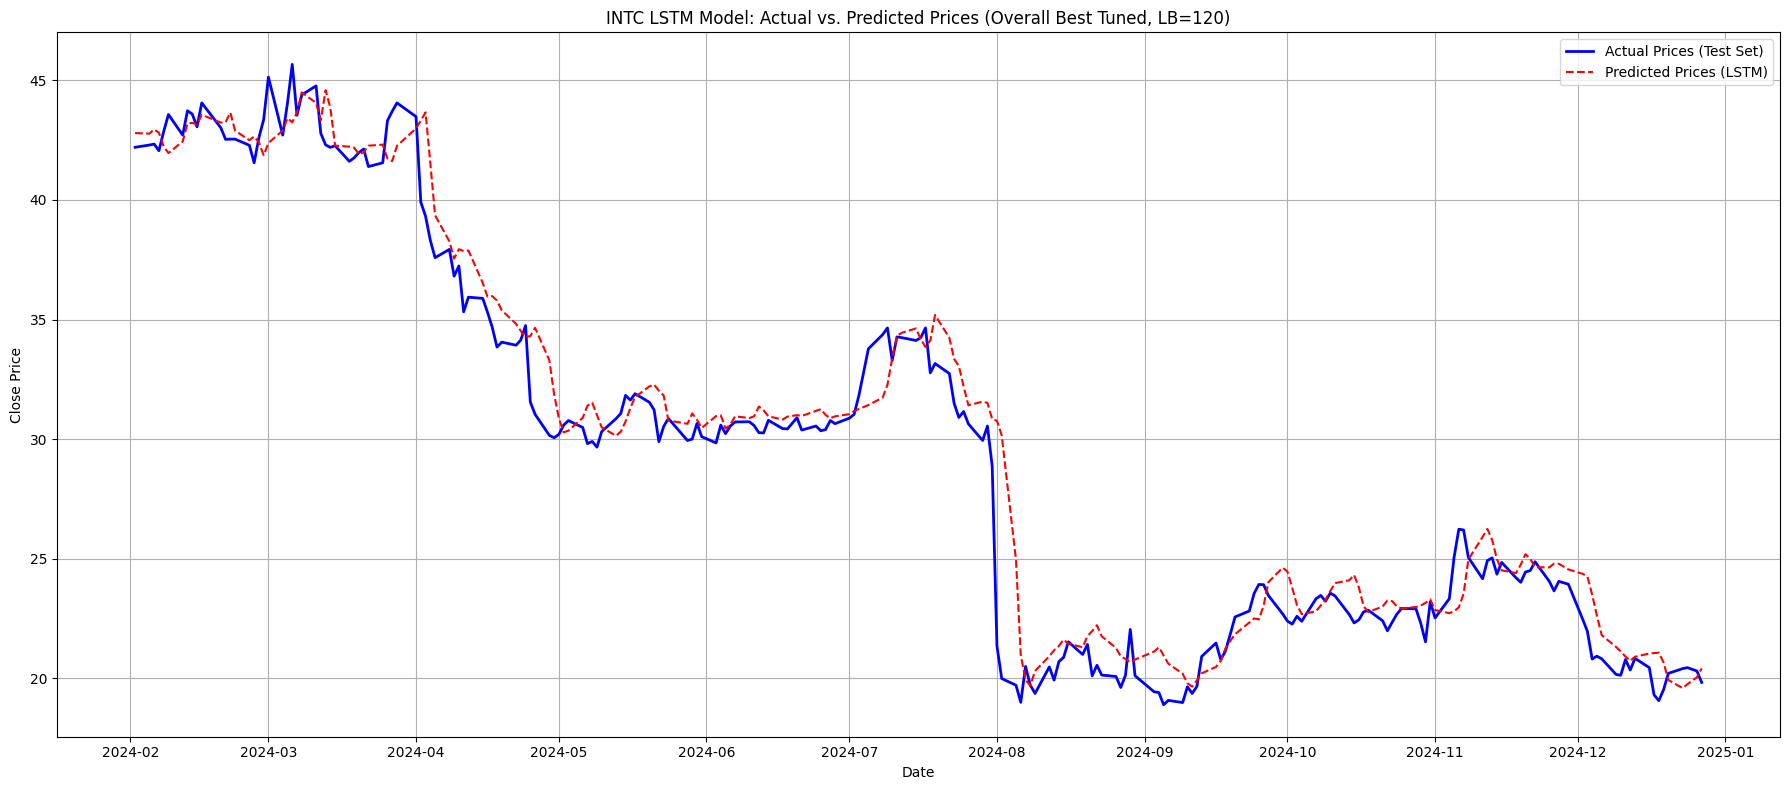


--- LSTM Training History for INTC (Overall Best Tuned, LB=120) ---


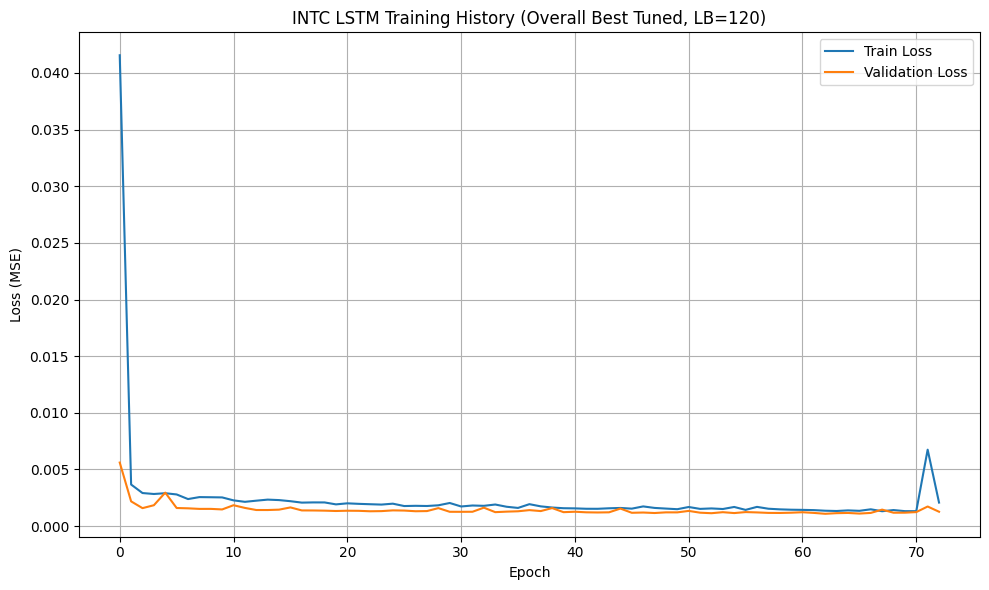


--- Visualizing LSTM Model Predictions for ALL Tickers ---


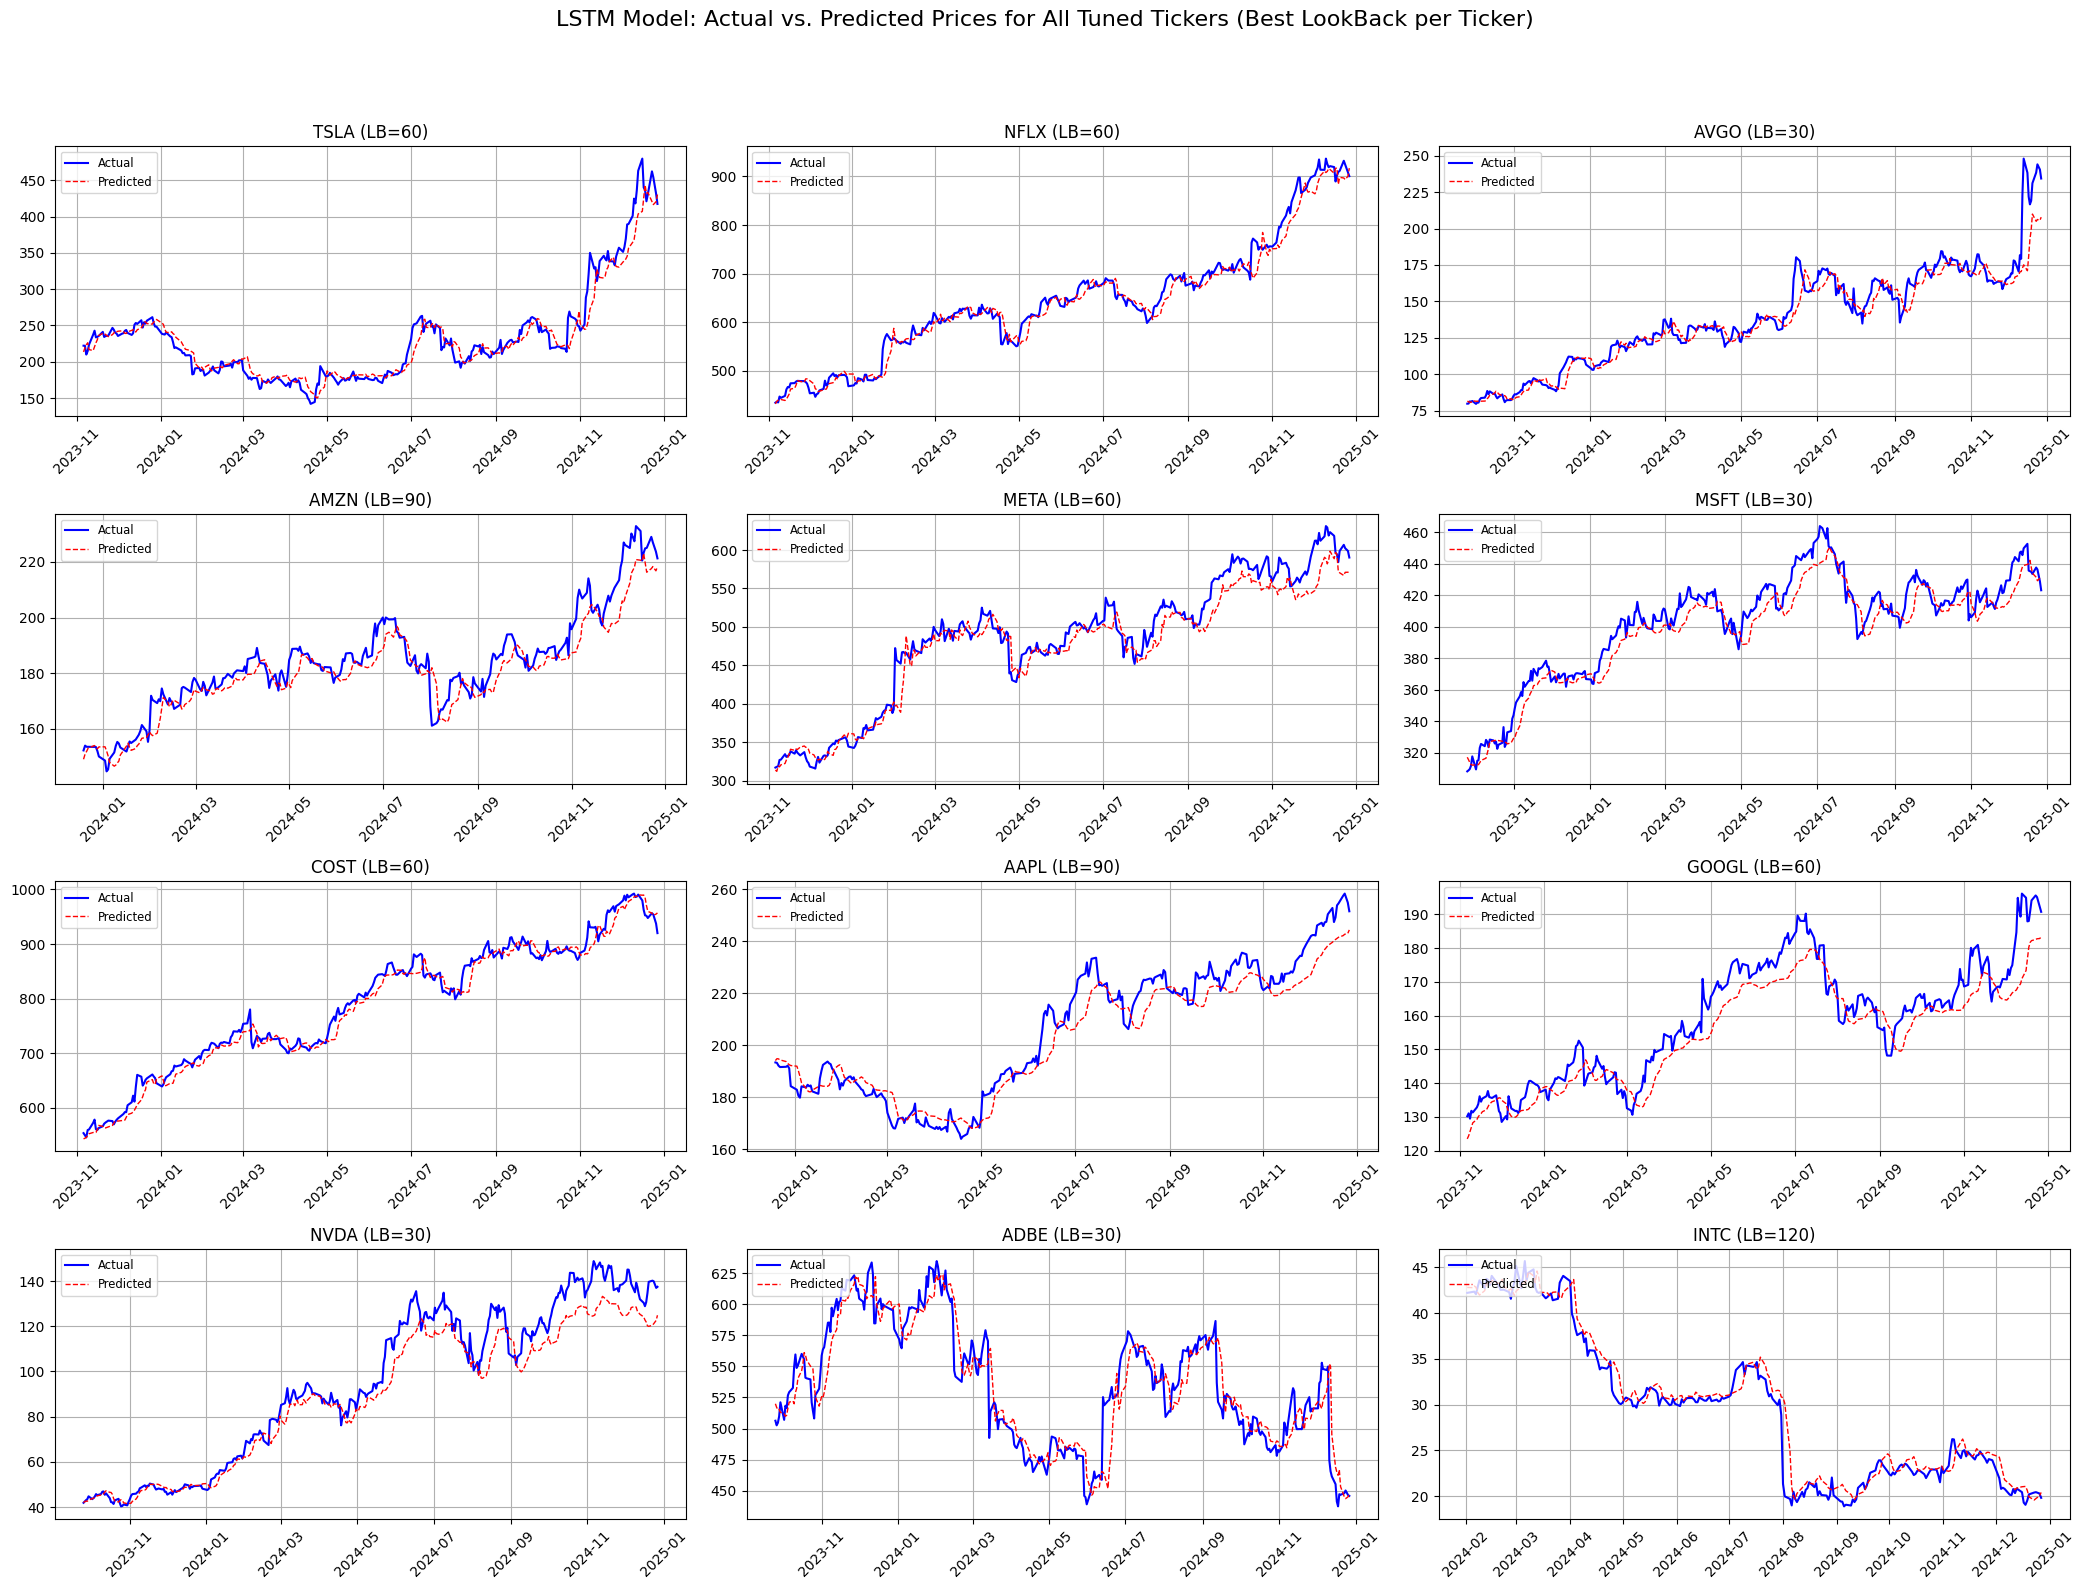

In [14]:
print("\n--- Visualizing LSTM Model Predictions ---")
if overall_best_ticker_val:
    print(f"\n--- Overall Best LSTM Model: Actual vs. Predicted Prices for {overall_best_ticker_val} (LookBack={overall_best_look_back_val}) ---")
    data_for_overall_best_plot = prepared_data_for_all_models['lstm'][overall_best_ticker_val][overall_best_look_back_val]

    y_actual = data_for_overall_best_plot['best_y_actual_lstm_original_scale_for_plot']
    y_predicted = data_for_overall_best_plot['best_y_pred_lstm_original_scale']
    history_to_plot = data_for_overall_best_plot['best_lstm_training_history']

    y_predicted_series = pd.Series(y_predicted.flatten(), index=y_actual.index, name='Predicted Close')

    plt.figure(figsize=(18, 8))
    plt.plot(y_actual.index, y_actual, label='Actual Prices (Test Set)', color='blue', linewidth=2)
    plt.plot(y_predicted_series.index, y_predicted_series, label='Predicted Prices (LSTM)', color='red', linestyle='--', linewidth=1.5)
    plt.title(f'{overall_best_ticker_val} LSTM Model: Actual vs. Predicted Prices (Overall Best Tuned, LB={overall_best_look_back_val})')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    plt.savefig(os.path.join(Plots_Output_Path, f"{overall_best_ticker_val}_LSTM_Actual_vs_Predicted_OverallBest_LB{overall_best_look_back_val}.png"))
    plt.close()

    print(f"\n--- LSTM Training History for {overall_best_ticker_val} (Overall Best Tuned, LB={overall_best_look_back_val}) ---")

    plt.figure(figsize=(10, 6))
    plt.plot(history_to_plot['loss'], label='Train Loss')
    plt.plot(history_to_plot['val_loss'], label='Validation Loss')
    plt.title(f'{overall_best_ticker_val} LSTM Training History (Overall Best Tuned, LB={overall_best_look_back_val})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    plt.savefig(os.path.join(Plots_Output_Path, f"{overall_best_ticker_val}_LSTM_Training_History_OverallBest_LB{overall_best_look_back_val}.png"))
    plt.close()
else:
    print("No overall best LSTM model found for visualization.")


print("\n--- Visualizing LSTM Model Predictions for ALL Tickers ---")

all_tuned_lstm_tickers = []
for ticker_name, look_back_data in prepared_data_for_all_models['lstm'].items():
    if look_back_data:
        best_rmse_for_ticker = float('inf')
        best_look_back_for_ticker = None
        for lb, data in look_back_data.items():
            if 'best_rmse' in data and data['best_rmse'] < best_rmse_for_ticker:
                best_rmse_for_ticker = data['best_rmse']
                best_look_back_for_ticker = lb
        if best_look_back_for_ticker is not None:
            all_tuned_lstm_tickers.append((ticker_name, best_look_back_for_ticker, look_back_data[best_look_back_for_ticker]))

if all_tuned_lstm_tickers:
    num_tickers_to_plot = len(all_tuned_lstm_tickers)
    n_cols = 3
    n_rows = math.ceil(num_tickers_to_plot / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 7, n_rows * 4), squeeze=False)
    axes = axes.flatten()

    for i, (ticker_name, lb, data) in enumerate(all_tuned_lstm_tickers):
        ax = axes[i]
        y_actual = data['best_y_actual_lstm_original_scale_for_plot']
        # Corrected line: use y_predicted specific to the current ticker
        y_predicted = pd.Series(data['best_y_pred_lstm_original_scale'].flatten(), index=y_actual.index, name='Predicted Close')

        ax.plot(y_actual.index, y_actual, label='Actual', color='blue', linewidth=1.5)
        ax.plot(y_predicted.index, y_predicted, label='Predicted', color='red', linestyle='--', linewidth=1)
        ax.set_title(f'{ticker_name} (LB={lb})')
        ax.tick_params(axis='x', rotation=45)
        ax.legend(loc='upper left', fontsize='small')
        ax.grid(True)

    for j in range(num_tickers_to_plot, len(axes)):
        axes[j].set_visible(False)

    plt.suptitle('LSTM Model: Actual vs. Predicted Prices for All Tuned Tickers (Best LookBack per Ticker)', fontsize=16, y=1.02)
    plt.tight_layout(rect=[0, 0.03, 1, 0.98])
    plt.show()
    plt.savefig(os.path.join(Plots_Output_Path, 'All_Tickers_LSTM_Actual_vs_Predicted_PerTickerBestLB.png'))
    plt.close()
else:
    print("No LSTM model predictions available for plotting all tickers.")

## XGBoost Model

In [27]:
print("\n\n" + "="*50)
print("        XGBOOST MODEL TRAINING AND EVALUATION")
print("="*50)

# Global variables to track best model
overall_best_xgb_rmse = float('inf')
overall_best_xgb_ticker = None
overall_best_xgb_params = None

if not prepared_data_for_all_models['xgboost']:
    print("No XGBoost data prepared for any ticker. Skipping XGBoost model training.")
else:
    for ticker, data in prepared_data_for_all_models['xgboost'].items():
        X_train = data['X_train']
        y_train = data['y_train']
        X_test = data['X_test']
        y_test = data['y_test']
        X_val = data['X_val']
        y_val = data['y_val']

        if X_train.shape[0] == 0 or X_test.shape[0] == 0:
            print(f"Skipping XGBoost training for {ticker}: Insufficient data.")
            continue

        xgb_model_file_name = f'{ticker}_best_xgboost_model.json'
        xgb_model_path = os.path.join(TRAINED_XGBOOST_MODELS_DIR, xgb_model_file_name)

        if os.path.exists(xgb_model_path) and 'best_y_pred_xgb_original_scale' in data:
            print(f"Loading trained XGBoost model for {ticker}...")
            model = xgb.Booster()
            model.load_model(xgb_model_path)
            y_pred = data['best_y_pred_xgb_original_scale']
            rmse = data['best_xgb_rmse']
            mae = data['best_xgb_mae']
            print(f"  Loaded - Test RMSE: {rmse:.4f}, MAE: {mae:.4f}")
        else:
            print(f"\n--- Hyperparameter tuning for {ticker} ---")
            param_grid = {
                'n_estimators': [100, 200, 300],
                'max_depth': [3, 5, 7],
                'learning_rate': [0.01, 0.05, 0.1],
                'subsample': [0.6, 0.8, 1.0],
                'colsample_bytree': [0.6, 0.8, 1.0]
            }

            reg = xgb.XGBRegressor(objective='reg:squarederror', n_jobs=-1, random_state=42, verbosity=0)
            search = RandomizedSearchCV(reg, param_grid, n_iter=10, cv=3, scoring='neg_root_mean_squared_error', verbose=0, n_jobs=-1)
            search.fit(X_train, y_train)

            best_params = search.best_params_
            print(f"  Best params: {best_params}")

            # Prepare DMatrices
            dtrain = xgb.DMatrix(X_train, label=y_train)
            dval = xgb.DMatrix(X_val, label=y_val)
            dtest = xgb.DMatrix(X_test)

            xgb_params = {
                'objective': 'reg:squarederror',
                'eval_metric': 'rmse',
                'learning_rate': best_params['learning_rate'],
                'max_depth': best_params['max_depth'],
                'subsample': best_params['subsample'],
                'colsample_bytree': best_params['colsample_bytree'],
                'nthread': -1,
                'seed': 42
            }

            evals = [(dtrain, 'train'), (dval, 'eval')]

            model = xgb.train(
                params=xgb_params,
                dtrain=dtrain,
                num_boost_round=best_params['n_estimators'],
                evals=evals,
                early_stopping_rounds=30,
                verbose_eval=False
            )

            y_pred = model.predict(dtest)
            rmse = math.sqrt(mean_squared_error(y_test, y_pred))
            mae = mean_absolute_error(y_test, y_pred)

            print(f"  XGBoost RMSE for {ticker}: {rmse:.4f}, MAE: {mae:.4f}")
            model.save_model(xgb_model_path)
            print(f"  Saved model to {xgb_model_path}")

        # Save results
        data['best_y_pred_xgb_original_scale'] = y_pred
        data['best_y_actual_xgb_original_scale_for_plot'] = y_test
        data['best_xgb_rmse'] = rmse
        data['best_xgb_mae'] = mae

        if rmse < overall_best_xgb_rmse:
            overall_best_xgb_rmse = rmse
            overall_best_xgb_ticker = ticker
            overall_best_xgb_params = best_params

print("\n" + "="*80)
print("             XGBOOST MODEL TRAINING COMPLETE.")
print("="*80)

if overall_best_xgb_ticker:
    print(f"\nBest RMSE: {overall_best_xgb_rmse:.4f} for {overall_best_xgb_ticker}")
else:
    print("No successful XGBoost training occurred.")

# Save updated results
if any(v for d in prepared_data_for_all_models['lstm'].values() for v in d.values()) or \
   any(prepared_data_for_all_models['xgboost'].values()) or \
   any(prepared_data_for_all_models['arima'].values()):
    with open(PREPARED_DATA_PKL_PATH, 'wb') as f:
        pickle.dump(prepared_data_for_all_models, f)
    print(f"\nSaved updated predictions to {PREPARED_DATA_PKL_PATH}")
else:
    print("\nNothing to save. No models trained.")



        XGBOOST MODEL TRAINING AND EVALUATION

--- Hyperparameter tuning for TSLA ---
  Best params: {'subsample': 0.6, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.6}
  XGBoost RMSE for TSLA: 20.6969, MAE: 12.7964
  Saved model to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/trained_xgboost_models/TSLA_best_xgboost_model.json

--- Hyperparameter tuning for NFLX ---
  Best params: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.6}
  XGBoost RMSE for NFLX: 79.1218, MAE: 40.7420
  Saved model to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/trained_xgboost_models/NFLX_best_xgboost_model.json

--- Hyperparameter tuning for AVGO ---
  Best params: {'subsample': 0.6, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.6}
  XGBoost RMSE for AVGO: 82.8141, MAE: 74.4439
  Saved model to /content/drive/MyDrive/Colab Note

### XGBoost Visualizations


 Visualizing XGBoost Model Predictions for ALL Tickers 


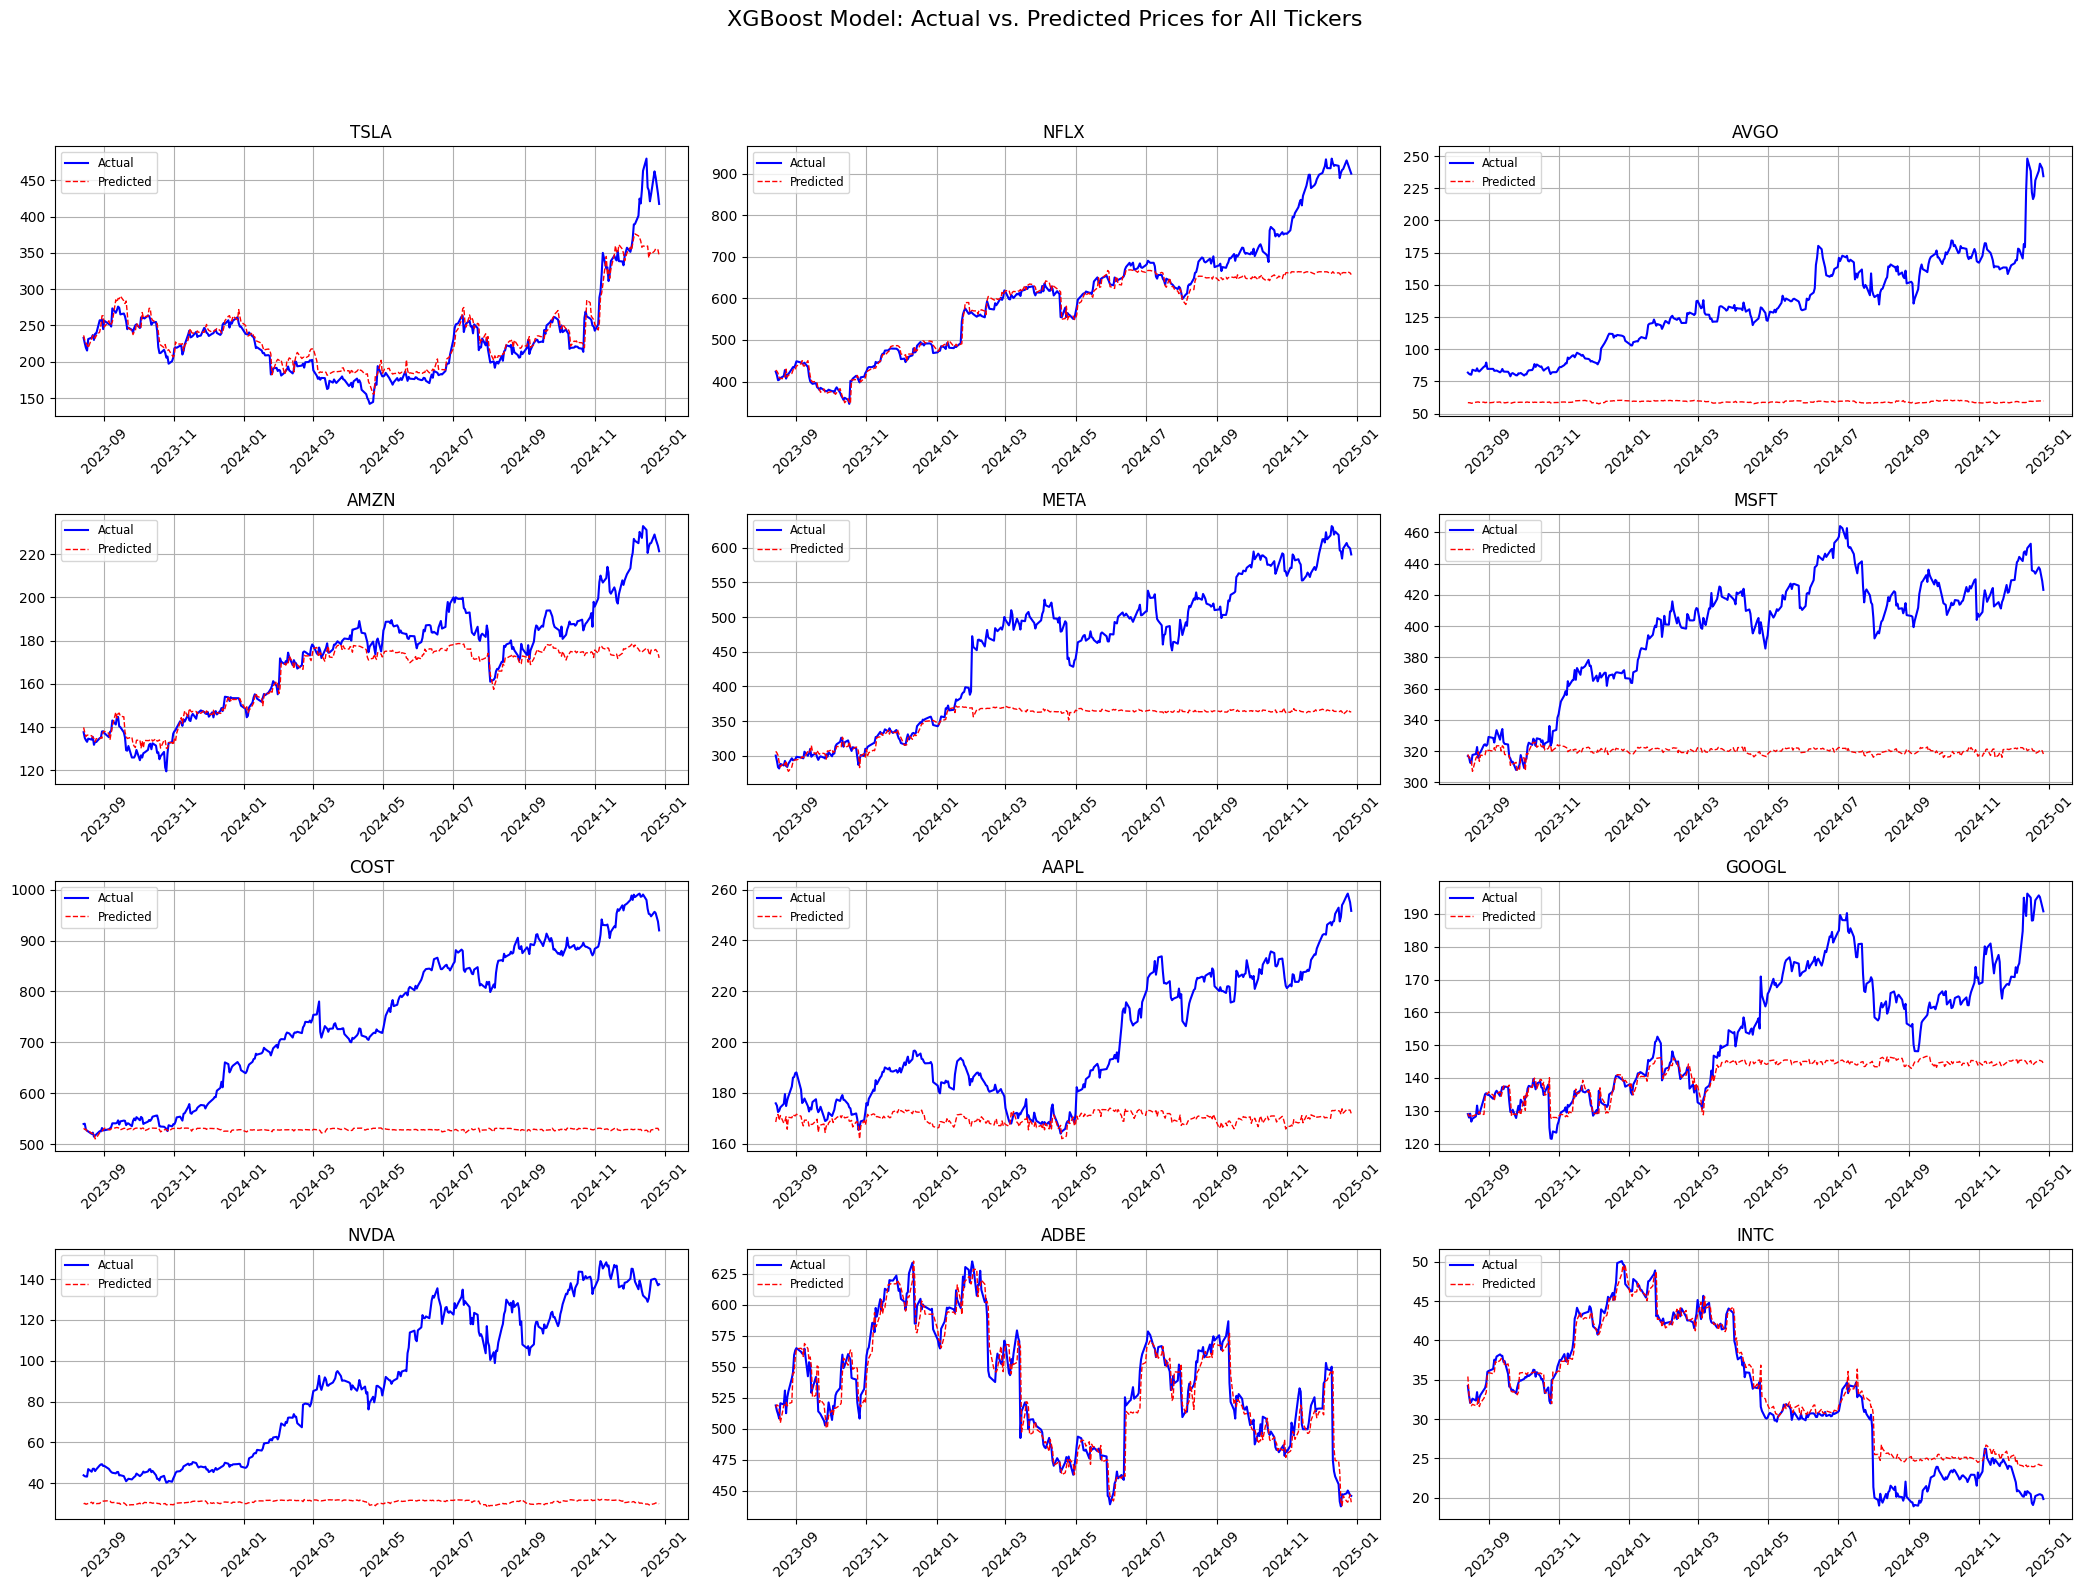

In [28]:
print("\n Visualizing XGBoost Model Predictions for ALL Tickers ")

all_xgboost_tickers = []
for ticker_name, data in prepared_data_for_all_models['xgboost'].items():
    if 'best_y_pred_xgb_original_scale' in data and data['best_y_actual_xgb_original_scale_for_plot'].shape[0] > 0:
        all_xgboost_tickers.append((ticker_name, data))

if all_xgboost_tickers:
    num_tickers_to_plot = len(all_xgboost_tickers)
    n_cols = 3
    n_rows = math.ceil(num_tickers_to_plot / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 7, n_rows * 4), squeeze=False)
    axes = axes.flatten()

    for i, (ticker_name, data) in enumerate(all_xgboost_tickers):
        ax = axes[i]
        y_actual = data['best_y_actual_xgb_original_scale_for_plot']
        y_predicted = pd.Series(data['best_y_pred_xgb_original_scale'], index=y_actual.index, name='Predicted Close')

        ax.plot(y_actual.index, y_actual, label='Actual', color='blue', linewidth=1.5)
        ax.plot(y_predicted.index, y_predicted, label='Predicted', color='red', linestyle='--', linewidth=1)
        ax.set_title(f'{ticker_name}')
        ax.tick_params(axis='x', rotation=45)
        ax.legend(loc='upper left', fontsize='small')
        ax.grid(True)

    for j in range(num_tickers_to_plot, len(axes)):
        axes[j].set_visible(False)

    plt.suptitle('XGBoost Model: Actual vs. Predicted Prices for All Tickers', fontsize=16, y=1.02)
    plt.tight_layout(rect=[0, 0.03, 1, 0.98])
    plt.show()
    plt.savefig(os.path.join(Plots_Output_Path, 'All_Tickers_XGBoost_Actual_vs_Predicted.png'))
    plt.close()
else:
    print("No XGBoost model predictions available for plotting all tickers.")


## ARIMA Model

In [29]:
print("\n\n" + "="*80)
print("          ARIMA MODEL TRAINING AND EVALUATION")
print("="*80)

overall_best_arima_rmse = float('inf')
overall_best_arima_ticker = None
overall_best_arima_order = None

# Automated ARIMA order selection parameters
ARIMA_AUTO_PARAMS = {
    'start_p': 0, 'max_p': 5, # Max AR order
    'start_q': 0, 'max_q': 5, # Max MA order
    'd': None, 'max_d': 2, # Differencing order will be chosen or default to 1 (if ADF is non-stationary)
    'seasonal': False,
    'stepwise': True, # Efficient search strategy
    'suppress_warnings': True, # Suppress convergence warnings
    'trace': False, # Don't print model search progress
    'error_action': 'ignore', # Ignore models that fail to converge
    'n_jobs': -1
}


if not prepared_data_for_all_models['arima']:
    print("No ARIMA data prepared for any ticker. Skipping ARIMA model training.")
else:
    for ticker, data in prepared_data_for_all_models['arima'].items():
        train_data = data['train_data']
        test_data = data['test_data']
        adf_p_value = data['adf_p_value'] # Use calculated ADF p-value

        if train_data.empty or test_data.empty:
            print(f"Skipping ARIMA training for {ticker}: Insufficient data for train/test sets.")
            continue

        arima_model_file_name = f'{ticker}_best_arima_model.pkl'
        arima_model_path = os.path.join(TRAINED_ARIMA_MODELS_DIR, arima_model_file_name)

        if os.path.exists(arima_model_path) and 'best_y_pred_arima_original_scale' in data:
            print(f"Loading trained ARIMA model for {ticker} from {arima_model_path} and its predictions...")
            with open(arima_model_path, 'rb') as f:
                arima_model_fit = pickle.load(f)
            y_pred = data['best_y_pred_arima_original_scale']
            rmse = data['best_arima_rmse']
            mae = data['best_arima_mae']
            best_order = data['best_arima_order'] # Retrieve saved order
            print(f"  Loaded (Order: {best_order}) - Test RMSE: {rmse:.4f}, MAE: {mae:.4f}")
        else:
            print(f"\n--- Training ARIMA model for {ticker} (Automated Order Selection) ---")
            try:
                # Set d parameter for auto_arima based on ADF test result (if not set in auto_params)
                # If ADF p-value > 0.05, suggest d=1; else d=0. max_d also limits this.
                current_d = 1 if adf_p_value > 0.05 else 0

                # --- MODIFIED: Use auto_arima for order selection ---
                # auto_arima will also fit the model internally
                stepwise_fit = auto_arima(train_data,
                                          start_p=ARIMA_AUTO_PARAMS['start_p'], max_p=ARIMA_AUTO_PARAMS['max_p'],
                                          start_q=ARIMA_AUTO_PARAMS['start_q'], max_q=ARIMA_AUTO_PARAMS['max_q'],
                                          d=current_d, max_d=ARIMA_AUTO_PARAMS['max_d'], # Use determined d
                                          seasonal=ARIMA_AUTO_PARAMS['seasonal'],
                                          stepwise=ARIMA_AUTO_PARAMS['stepwise'],
                                          suppress_warnings=ARIMA_AUTO_PARAMS['suppress_warnings'],
                                          trace=ARIMA_AUTO_PARAMS['trace'],
                                          error_action=ARIMA_AUTO_PARAMS['error_action'],
                                          n_jobs=ARIMA_AUTO_PARAMS['n_jobs'])

                best_order = stepwise_fit.order # Get the best (p,d,q) order

                # Re-fit the ARIMA model using statsmodels with the chosen order for consistency and saving
                # This ensures we have a standard statsmodels fitted object
                arima_model = ARIMA(train_data, order=best_order)
                arima_model_fit = arima_model.fit()

                y_pred_forecast = arima_model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)
                y_pred_forecast.index = test_data.index
                y_pred = y_pred_forecast.values

                rmse = math.sqrt(mean_squared_error(test_data, y_pred))
                mae = mean_absolute_error(test_data, y_pred)

                print(f"  ARIMA Test RMSE for {ticker} (Order: {best_order}): {rmse:.4f}, MAE: {mae:.4f}")

                with open(arima_model_path, 'wb') as f:
                    pickle.dump(arima_model_fit, f)
                print(f"Best ARIMA model for {ticker} saved to {arima_model_path}")

            except Exception as e:
                print(f"  Error training or predicting ARIMA for {ticker}: {e}. Skipping.")
                rmse, mae, y_pred, best_order = float('inf'), float('inf'), np.array([]), (None, None, None)
                if ticker in prepared_data_for_all_models['arima']:
                    if 'best_y_pred_arima_original_scale' in prepared_data_for_all_models['arima'][ticker]:
                        del prepared_data_for_all_models['arima'][ticker]['best_y_pred_arima_original_scale']
                    if 'best_arima_rmse' in prepared_data_for_all_models['arima'][ticker]:
                        del prepared_data_for_all_models['arima'][ticker]['best_arima_rmse']
                    if 'best_arima_mae' in prepared_data_for_all_models['arima'][ticker]:
                        del prepared_data_for_all_models['arima'][ticker]['best_arima_mae']
                continue

        if y_pred.size > 0:
            data['best_y_pred_arima_original_scale'] = y_pred
            data['best_y_actual_arima_original_scale_for_plot'] = test_data
            data['best_arima_rmse'] = rmse
            data['best_arima_mae'] = mae
            data['best_arima_order'] = best_order

            if rmse < overall_best_arima_rmse:
                overall_best_arima_rmse = rmse
                overall_best_arima_ticker = ticker
                overall_best_arima_order = best_order

print("\n" + "="*80)
print("             ARIMA MODEL TRAINING COMPLETE.")
print("="*80)

if overall_best_arima_ticker:
    print(f"\nOverall Best ARIMA RMSE across all tickers: {overall_best_arima_rmse:.4f} achieved for {overall_best_arima_ticker}")
    print(f"  with order: {overall_best_arima_order}")
else:
    print("No successful ARIMA model training and evaluation occurred.")

# --- Final Save of prepared_data_for_all_models (after ARIMA training/predictions) ---
# This ensures all predictions (LSTM, XGBoost, ARIMA) are saved
if any(v for d in prepared_data_for_all_models['lstm'].values() for v in d.values()) or \
   any(prepared_data_for_all_models['xgboost'].values()) or \
   any(prepared_data_for_all_models['arima'].values()):
    with open(PREPARED_DATA_PKL_PATH, 'wb') as f:
        pickle.dump(prepared_data_for_all_models, f)
    print(f"\nPrepared_data_for_all_models updated with ARIMA predictions saved to {PREPARED_DATA_PKL_PATH}")
else:
    print("\nNo data was successfully prepared or ARIMA predictions made to update prepared_data_for_all_models.pkl.")





          ARIMA MODEL TRAINING AND EVALUATION

--- Training ARIMA model for TSLA (Automated Order Selection) ---
  ARIMA Test RMSE for TSLA (Order: (0, 1, 0)): 61.2644, MAE: 43.7613
Best ARIMA model for TSLA saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/trained_arima_models/TSLA_best_arima_model.pkl

--- Training ARIMA model for NFLX (Automated Order Selection) ---
  ARIMA Test RMSE for NFLX (Order: (0, 1, 0)): 231.8979, MAE: 189.0846
Best ARIMA model for NFLX saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/trained_arima_models/NFLX_best_arima_model.pkl

--- Training ARIMA model for AVGO (Automated Order Selection) ---
  ARIMA Test RMSE for AVGO (Order: (2, 1, 2)): 64.0361, MAE: 52.6802
Best ARIMA model for AVGO saved to /content/drive/MyDrive/Colab Notebooks/Stock_Market_Data_With_Indicators/trained_arima_models/AVGO_best_arima_model.pkl

--- Training ARIMA model for AMZN (Automated Order Selection) ---
  ARIMA Te

### ARIMA Visualization


--- Visualizing ARIMA Model Predictions ---

--- Overall Best ARIMA Model: Actual vs. Predicted Prices for INTC ---


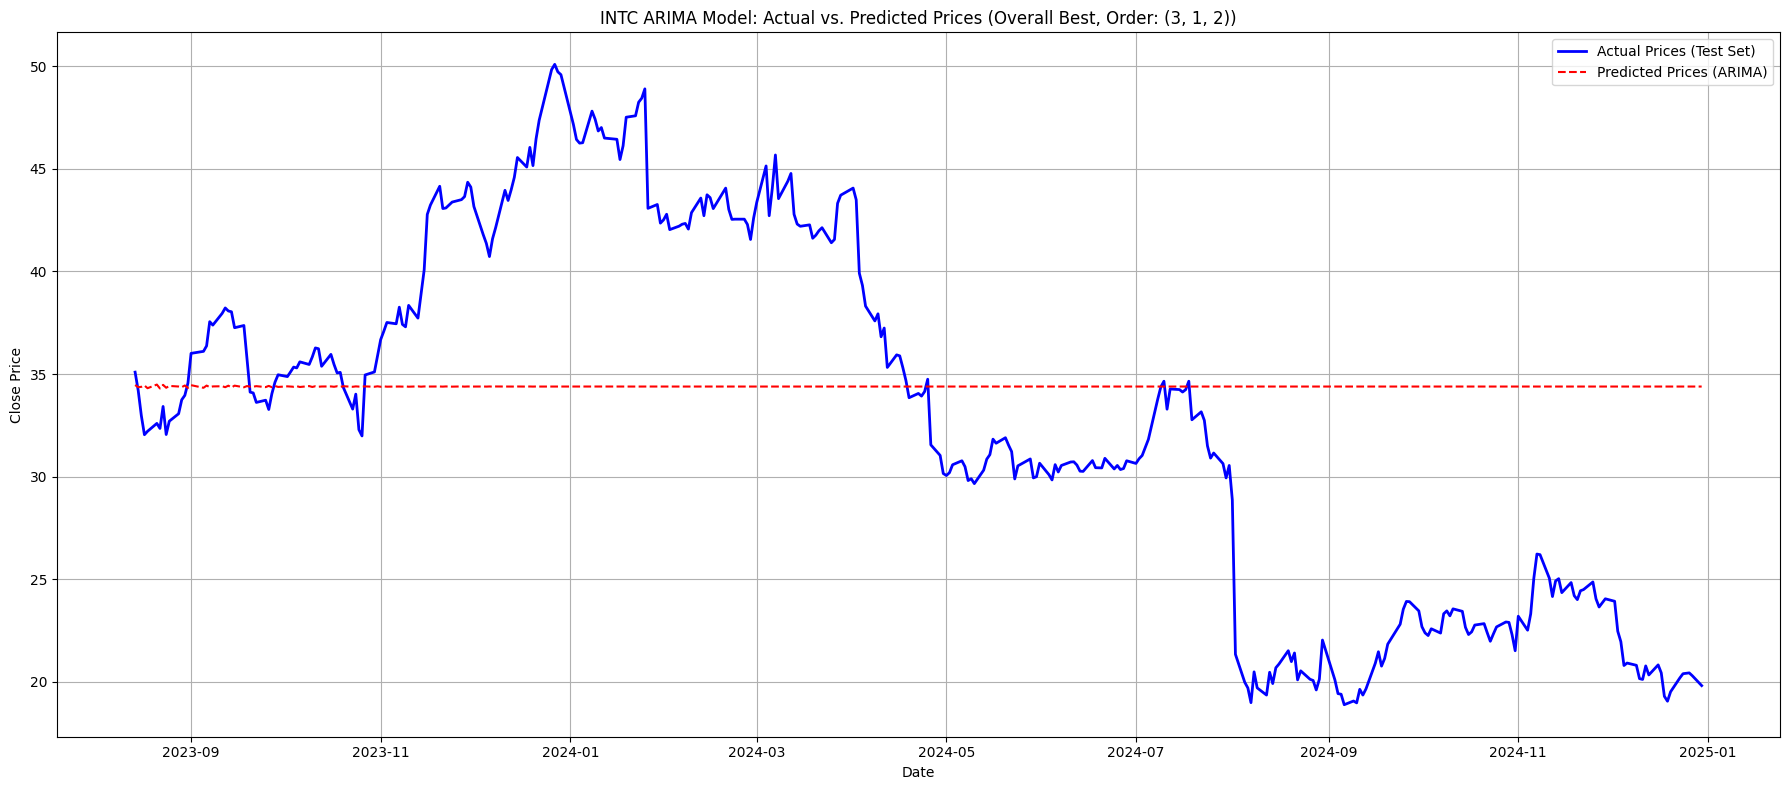


Visualizing ARIMA Model Predictions for ALL Tickers 


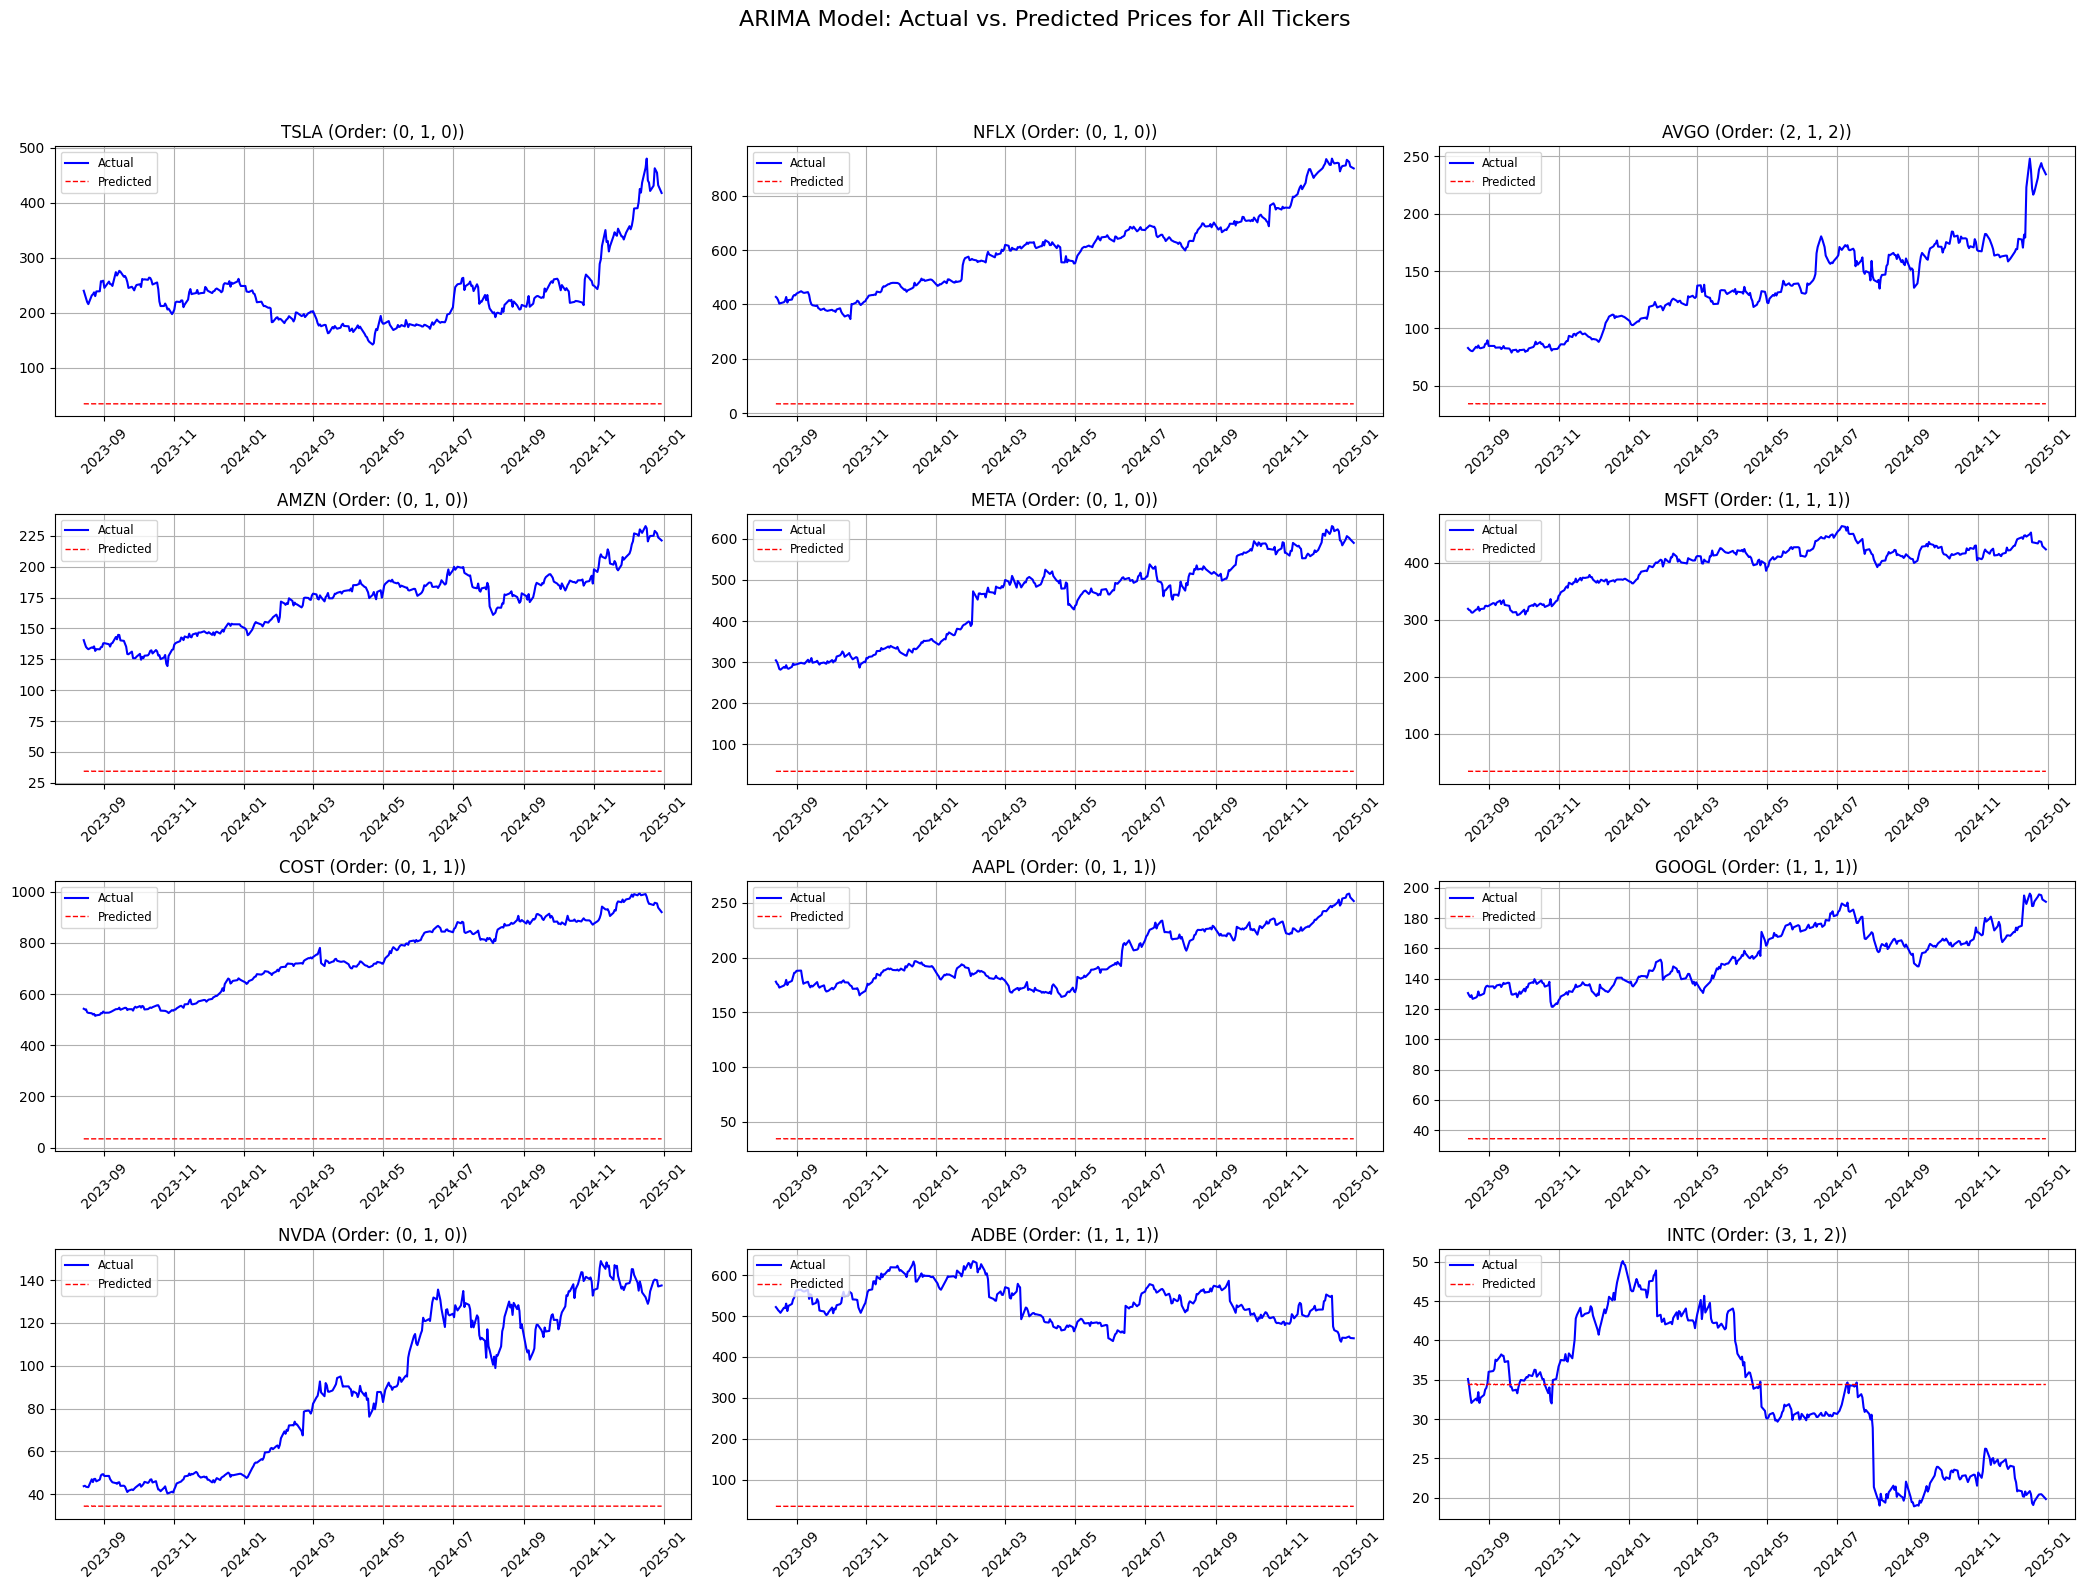

In [30]:
print("\n--- Visualizing ARIMA Model Predictions ---")

# Visualization for the Overall Best ARIMA Model found
if overall_best_arima_ticker:
    print(f"\n--- Overall Best ARIMA Model: Actual vs. Predicted Prices for {overall_best_arima_ticker} ---")
    data_for_overall_best_plot = prepared_data_for_all_models['arima'][overall_best_arima_ticker]

    y_actual = data_for_overall_best_plot['best_y_actual_arima_original_scale_for_plot']
    y_predicted = data_for_overall_best_plot['best_y_pred_arima_original_scale']

    y_predicted_series = pd.Series(y_predicted, index=y_actual.index, name='Predicted Close')

    plt.figure(figsize=(18, 8))
    plt.plot(y_actual.index, y_actual, label='Actual Prices (Test Set)', color='blue', linewidth=2)
    plt.plot(y_predicted_series.index, y_predicted_series, label='Predicted Prices (ARIMA)', color='red', linestyle='--', linewidth=1.5)
    plt.title(f'{overall_best_arima_ticker} ARIMA Model: Actual vs. Predicted Prices (Overall Best, Order: {overall_best_arima_order})')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    plt.savefig(os.path.join(Plots_Output_Path, f"{overall_best_arima_ticker}_ARIMA_Actual_vs_Predicted_OverallBest.png"))
    plt.close()
else:
    print("No overall best ARIMA model found for visualization.")

# Visualizing ARIMA Model Predictions for ALL Tickers
print("\nVisualizing ARIMA Model Predictions for ALL Tickers ")

all_arima_tickers = []
for ticker_name, data in prepared_data_for_all_models['arima'].items():
    if 'best_y_pred_arima_original_scale' in data and data['best_y_actual_arima_original_scale_for_plot'].shape[0] > 0:
        all_arima_tickers.append((ticker_name, data))

if all_arima_tickers:
    num_tickers_to_plot = len(all_arima_tickers)
    n_cols = 3
    n_rows = math.ceil(num_tickers_to_plot / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 7, n_rows * 4), squeeze=False)
    axes = axes.flatten()

    for i, (ticker_name, data) in enumerate(all_arima_tickers):
        ax = axes[i]
        y_actual = data['best_y_actual_arima_original_scale_for_plot']
        y_predicted = pd.Series(y_predicted, index=y_actual.index, name='Predicted Close')

        ax.plot(y_actual.index, y_actual, label='Actual', color='blue', linewidth=1.5)
        ax.plot(y_predicted.index, y_predicted, label='Predicted', color='red', linestyle='--', linewidth=1)
        ax.set_title(f'{ticker_name} (Order: {data["best_arima_order"]})')
        ax.tick_params(axis='x', rotation=45)
        ax.legend(loc='upper left', fontsize='small')
        ax.grid(True)

    for j in range(num_tickers_to_plot, len(axes)):
        axes[j].set_visible(False)

    plt.suptitle('ARIMA Model: Actual vs. Predicted Prices for All Tickers', fontsize=16, y=1.02)
    plt.tight_layout(rect=[0, 0.03, 1, 0.98])
    plt.show()
    plt.savefig(os.path.join(Plots_Output_Path, 'All_Tickers_ARIMA_Actual_vs_Predicted.png'))
    plt.close()
else:
    print("No ARIMA model predictions available for plotting all tickers.")
